In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


info_tourism = pd.read_csv("tourism_with_id.csv")
tourism_rating = pd.read_csv("tourism_rating.csv")
users = pd.read_csv("user.csv")

# Exploratory Data Analysis(EDA)

In [2]:
info_tourism.head(4)

Place_Id                         Place_Name  \
0         1                   Monumen Nasional   
1         2                           Kota Tua   
2         3                      Dunia Fantasi   
3         4  Taman Mini Indonesia Indah (TMII)   

                                         Description       Category     City  \
0  Monumen Nasional atau yang populer disingkat d...         Budaya  Jakarta   
1  Kota tua di Jakarta, yang juga bernama Kota Tu...         Budaya  Jakarta   
2  Dunia Fantasi atau disebut juga Dufan adalah t...  Taman Hiburan  Jakarta   
3  Taman Mini Indonesia Indah merupakan suatu kaw...  Taman Hiburan  Jakarta   

    Price  Rating  Time_Minutes  \
0   20000     4.6          15.0   
1       0     4.6          90.0   
2  270000     4.6         360.0   
3   10000     4.5           NaN   

                                        Coordinate       Lat        Long  \
0          {'lat': -6.1753924, 'lng': 106.8271528} -6.175392  106.827153   
1  {'lat': -6.137644799999999, 'lng': 106.8171245} -6.137645  106.817125   
2  {'lat': -6.125312399999999, 'lng': 106.8335377} -6.125312  106.833538   
3  {'lat': -6.302445899999999, 'lng': 106.8951559} -6.302446  106.895156   

   Unnamed: 11  Unnamed: 12  
0          NaN            1  
1          NaN            2  
2          NaN            3  
3          NaN            4

In [3]:
tourism_rating.head(4)

User_Id  Place_Id  Place_Ratings
0        1       179              3
1        1       344              2
2        1         5              5
3        1       373              3

In [93]:
tourism_rating.User_Id.value_counts()

User_Id
267    53
276    50
143    47
40     47
142    46
       ..
275    23
48     22
21     22
151    22
60     21
Name: count, Length: 300, dtype: int64

In [91]:
tour_dupli = tourism_rating.drop_duplicates(subset = 'User_Id')
tour_dupli.shape

(300, 3)

In [4]:
users.head(4)

User_Id               Location  Age
0        1  Semarang, Jawa Tengah   20
1        2     Bekasi, Jawa Barat   21
2        3    Cirebon, Jawa Barat   23
3        4     Bekasi, Jawa Barat   21

In [90]:
users.shape

(300, 3)

In [89]:
users.User_Id.value_counts()
user_dupli = users.drop_duplicates(subset = 'User_Id')
user_dupli.shape

(300, 3)

In [7]:
print("Number of places in the info_tourism data:", info_tourism['Place_Id'].nunique())
print("Number of users:", users['User_Id'].nunique())
print("The number of ratings given by the user(considering only unique ratings by a user):", tourism_rating['User_Id'].nunique())
print(f"The number of ratings given by the user(all ratings) : {len(tourism_rating.User_Id)}")

Number of places in the info_tourism data: 437
Number of users: 300
The number of ratings given by the user(considering only unique ratings by a user): 300
The number of ratings given by the user(all ratings) : 10000


In [8]:
info_tourism.describe()

Place_Id          Price      Rating  Time_Minutes         Lat  \
count  437.000000     437.000000  437.000000    205.000000  437.000000   
mean   219.000000   24652.173913    4.442792     82.609756   -7.095438   
std    126.295289   66446.374709    0.208587     52.872339    0.727241   
min      1.000000       0.000000    3.400000     10.000000   -8.197894   
25%    110.000000       0.000000    4.300000     45.000000   -7.749590   
50%    219.000000    5000.000000    4.500000     60.000000   -7.020524   
75%    328.000000   20000.000000    4.600000    120.000000   -6.829411   
max    437.000000  900000.000000    5.000000    360.000000    1.078880   

             Long  Unnamed: 11  Unnamed: 12  
count  437.000000          0.0   437.000000  
mean   109.160142          NaN   219.000000  
std      1.962848          NaN   126.295289  
min    103.931398          NaN     1.000000  
25%    107.578369          NaN   110.000000  
50%    110.237468          NaN   219.000000  
75%    110.431869          NaN   328.000000  
max    112.821662          NaN   437.000000

In [9]:
info_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [10]:
info_tourism.isnull().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

In [17]:
info_tourism.Category.unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

In [18]:
info_tourism.City.unique()

array(['Jakarta', 'Yogyakarta', 'Bandung', 'Semarang', 'Surabaya'],
      dtype=object)

In [11]:
tourism_rating.describe()

User_Id      Place_Id  Place_Ratings
count  10000.000000  10000.000000   10000.000000
mean     151.292700    219.416400       3.066500
std       86.137374    126.228335       1.379952
min        1.000000      1.000000       1.000000
25%       77.000000    108.750000       2.000000
50%      151.000000    220.000000       3.000000
75%      226.000000    329.000000       4.000000
max      300.000000    437.000000       5.000000

In [12]:
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [13]:
tourism_rating.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [14]:
users.describe()

User_Id         Age
count  300.000000  300.000000
mean   150.500000   28.700000
std     86.746758    6.393716
min      1.000000   18.000000
25%     75.750000   24.000000
50%    150.500000   29.000000
75%    225.250000   34.000000
max    300.000000   40.000000

In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [16]:
users.isnull().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [20]:

# Combine unique 'Place_Id' values from both datasets
tourism_all = pd.concat([info_tourism['Place_Id'], tourism_rating['Place_Id']]).unique()

# Count the total number of unique tourism places
total_tourism_places = len(tourism_all)

print(f"Total number of tourism: {total_tourism_places}")


Total number of tourism: 437


In [23]:
info_tour_df = info_tourism[["Place_Id","Place_Name","Description","City","Category","Price"]]

In [24]:
info_tour_df.head(4)

Place_Id                         Place_Name  \
0         1                   Monumen Nasional   
1         2                           Kota Tua   
2         3                      Dunia Fantasi   
3         4  Taman Mini Indonesia Indah (TMII)   

                                         Description     City       Category  \
0  Monumen Nasional atau yang populer disingkat d...  Jakarta         Budaya   
1  Kota tua di Jakarta, yang juga bernama Kota Tu...  Jakarta         Budaya   
2  Dunia Fantasi atau disebut juga Dufan adalah t...  Jakarta  Taman Hiburan   
3  Taman Mini Indonesia Indah merupakan suatu kaw...  Jakarta  Taman Hiburan   

    Price  
0   20000  
1       0  
2  270000  
3   10000

In [28]:
info_tourism.shape

(437, 13)

In [94]:
tour_user_df = pd.merge(tourism_rating,users,on='User_Id',how='left')

In [95]:
tour_user_df.shape

(10000, 5)

In [96]:
tourism_rating.shape

(10000, 3)

In [98]:
tour_user_df.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Location         0
Age              0
dtype: int64

In [100]:
final_tour_df = pd.merge(tour_user_df,info_tour_df,on=['Place_Id'], how='left')
final_tour_df.head(4)

User_Id  Place_Id  Place_Ratings               Location  Age  \
0        1       179              3  Semarang, Jawa Tengah   20   
1        1       344              2  Semarang, Jawa Tengah   20   
2        1         5              5  Semarang, Jawa Tengah   20   
3        1       373              3  Semarang, Jawa Tengah   20   

                 Place_Name  \
0           Candi Ratu Boko   
1             Pantai Marina   
2  Atlantis Water Adventure   
3    Museum Kereta Ambarawa   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Description  \
0                                                                                                                                              Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ꧀ꦝꦶ​ꦫꦠꦸ​ꦧꦏ, bahasa Jawa: Candhi Ratu Baka) adalah situs purbakala yang merupakan kompleks sejumlah sisa bangunan yang berada kira-kira 3 km di sebelah selatan dari kompleks Candi Prambanan, 18 km sebelah timur Kota Yogyakarta atau 50 km barat daya Kota Surakarta, Jawa Tengah, Indonesia. Situs Ratu Boko terletak di sebuah bukit pada ketinggian 196 meter dari permukaan laut. Luas keseluruhan kompleks adalah sekitar 25 ha.   
1                                                                                                                                        Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, translit. Pasisir Marina) adalah salah satu objek wisata pantai yang berada di kota Semarang, Jawa Tengah. Pantai ini menyimpan pemandangan eksotis khas kota Semarang. Dahulu, tempat ini merupakan hutan bakau dan tambak, tapi pemerintah setempat mengubahnya menjadi tempat rekreasi dengan cara reklamasi daratan. Hasil reklamasi dari hutan bakau ini, sekarang berupa perumahan, pertokoan, dan perkantoran, di sebelah selatan pantai.\r   
2                                                                                                                                                                                     Atlantis Water Adventure atau dikenal dengan Atlantis Ancol akan menyuguhkan petualangan wisata air tak terlupakan. Tempat Wisata bertemakan permainan air dengan luas 5 hektar ini memberi sensasi petualangan di 8 kolam utama. Yaitu kolam Antila, Plaza Atlas, Poseidon, Aquarius, Octopus, Kiddy Pool, dan Atlantean. Berlokasi di kawasan Ancol Jakarta Baycity, Atlantis bisa menjadi pilihan destinasi yang pas untuk wisata berenang.   
3  Museum Kereta Api Ambarawa (bahasa Inggris: Indonesian Railway Museum, Ambarawa) adalah sebuah stasiun kereta api yang sudah dialihfungsikan menjadi sebuah museum serta merupakan museum perkeretaapian pertama di Indonesia. Museum ini memiliki koleksi kereta api yang pernah berjaya pada zamannya. Museum ini secara administratif berada di Desa Panjang, Ambarawa, Semarang. Museum yang terletak pada ketinggian +474,40 meter ini termasuk dalam Daerah Operasi IV Semarang dan dikelola oleh Unit Pusat Pelestarian dan Desain Arsitektur PT Kereta Api Indonesia bekerja sama dengan Pemerintah Provinsi Jawa Tengah.   

         City       Category  Price  
0  Yogyakarta         Budaya  75000  
1    Semarang         Bahari   3000  
2     Jakarta  Taman Hiburan  94000  
3    Semarang         Budaya  10000

In [101]:
final_tour_df.shape

(10000, 10)

In [103]:
final_tour_df.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Location         0
Age              0
Place_Name       0
Description      0
City             0
Category         0
Price            0
dtype: int64

In [196]:
# Dropping Duplicates

subset_cols = ['User_Id','Place_Id','Place_Ratings']
df = final_tour_df.drop_duplicates(subset=subset_cols)

In [109]:
final_tour_df.shape

(10000, 10)

In [110]:
df.shape

(9921, 10)

In [197]:
df = df[['User_Id','Place_Id','Place_Ratings','Age','Place_Name','Description','City','Category','Price']]

In [115]:
df.head(4)

User_Id  Place_Id  Place_Ratings  Age                Place_Name  \
0        1       179              3   20           Candi Ratu Boko   
1        1       344              2   20             Pantai Marina   
2        1         5              5   20  Atlantis Water Adventure   
3        1       373              3   20    Museum Kereta Ambarawa   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Description  \
0                                                                                                                                              Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ꧀ꦝꦶ​ꦫꦠꦸ​ꦧꦏ, bahasa Jawa: Candhi Ratu Baka) adalah situs purbakala yang merupakan kompleks sejumlah sisa bangunan yang berada kira-kira 3 km di sebelah selatan dari kompleks Candi Prambanan, 18 km sebelah timur Kota Yogyakarta atau 50 km barat daya Kota Surakarta, Jawa Tengah, Indonesia. Situs Ratu Boko terletak di sebuah bukit pada ketinggian 196 meter dari permukaan laut. Luas keseluruhan kompleks adalah sekitar 25 ha.   
1                                                                                                                                        Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, translit. Pasisir Marina) adalah salah satu objek wisata pantai yang berada di kota Semarang, Jawa Tengah. Pantai ini menyimpan pemandangan eksotis khas kota Semarang. Dahulu, tempat ini merupakan hutan bakau dan tambak, tapi pemerintah setempat mengubahnya menjadi tempat rekreasi dengan cara reklamasi daratan. Hasil reklamasi dari hutan bakau ini, sekarang berupa perumahan, pertokoan, dan perkantoran, di sebelah selatan pantai.\r   
2                                                                                                                                                                                     Atlantis Water Adventure atau dikenal dengan Atlantis Ancol akan menyuguhkan petualangan wisata air tak terlupakan. Tempat Wisata bertemakan permainan air dengan luas 5 hektar ini memberi sensasi petualangan di 8 kolam utama. Yaitu kolam Antila, Plaza Atlas, Poseidon, Aquarius, Octopus, Kiddy Pool, dan Atlantean. Berlokasi di kawasan Ancol Jakarta Baycity, Atlantis bisa menjadi pilihan destinasi yang pas untuk wisata berenang.   
3  Museum Kereta Api Ambarawa (bahasa Inggris: Indonesian Railway Museum, Ambarawa) adalah sebuah stasiun kereta api yang sudah dialihfungsikan menjadi sebuah museum serta merupakan museum perkeretaapian pertama di Indonesia. Museum ini memiliki koleksi kereta api yang pernah berjaya pada zamannya. Museum ini secara administratif berada di Desa Panjang, Ambarawa, Semarang. Museum yang terletak pada ketinggian +474,40 meter ini termasuk dalam Daerah Operasi IV Semarang dan dikelola oleh Unit Pusat Pelestarian dan Desain Arsitektur PT Kereta Api Indonesia bekerja sama dengan Pemerintah Provinsi Jawa Tengah.   

         City       Category  Price  
0  Yogyakarta         Budaya  75000  
1    Semarang         Bahari   3000  
2     Jakarta  Taman Hiburan  94000  
3    Semarang         Budaya  10000

In [117]:
df.Place_Ratings.unique()

array([3, 2, 5, 4, 1], dtype=int64)

In [118]:
df.Age.unique()

array([20, 21, 23, 18, 39, 40, 38, 37, 26, 34, 31, 30, 25, 36, 22, 24, 32,
       27, 33, 35, 19, 29, 28], dtype=int64)

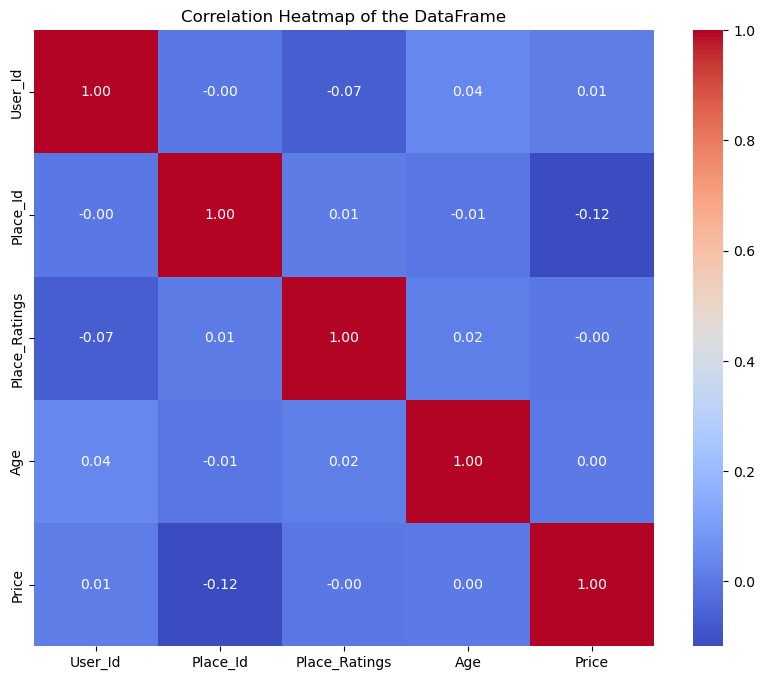

In [198]:
#Heatmap Plot to understand correlation between variables
df_corr = df[['User_Id','Place_Id','Place_Ratings','Age','Price']]
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of the DataFrame')
plt.show()


In [199]:
top_10 = df['Place_Id'].value_counts().reset_index().head(10)
top_10.head()

Place_Id  count
0       298     39
1       177     37
2       437     37
3       208     36
4       201     34

In [200]:
# Get the top 10 tourist places by the number of ratings
top_10 = pd.merge(top_10, df[['Place_Id','Place_Name']], how='left',on='Place_Id')
top_10 = top_10.drop_duplicates().reset_index()

top_10 = top_10[['Place_Id','count','Place_Name']]
top_10.head(10)
#top_10.shape

Place_Id  count                                 Place_Name
0       298     39                             Gunung Lalakon
1       177     37                        Pantai Parangtritis
2       437     37  Gereja Perawan Maria Tak Berdosa Surabaya
3       208     36                         Taman Sungai Mudal
4       201     34                             Pantai Kesirat
5       167     33              Geoforest Watu Payung Turunan
6        29     33                  Wisata Kuliner Pecenongan
7       248     33                       NuArt Sculpture Park
8       336     33                            Grand Maerakaca
9       344     33                              Pantai Marina

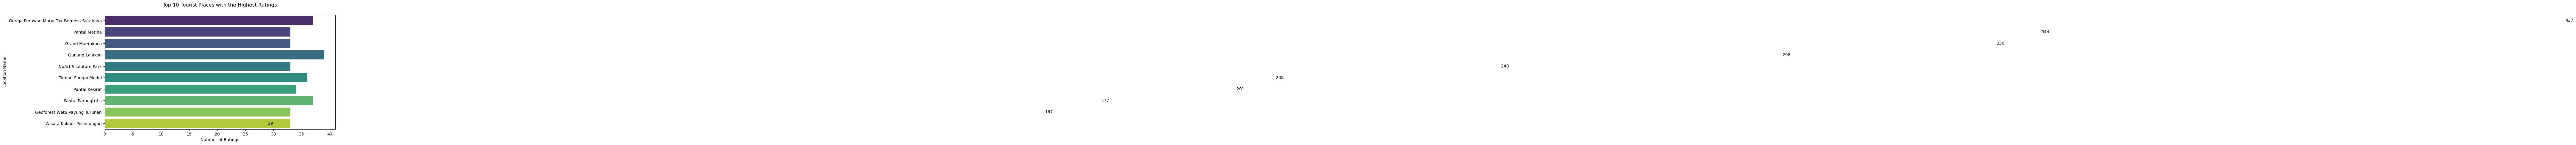

In [201]:

# Sorting the top 10 tourist places by the number of ratings
top_10_sorted = top_10.sort_values(by='Place_Id', ascending=False)

# Creating a horizontal bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='Place_Name', data=top_10_sorted, palette='viridis')

# Adding labels and title
plt.title('Top 10 Tourist Places with the Highest Ratings', pad=20)
plt.xlabel('Number of Ratings')
plt.ylabel('Location Name')

# Adding annotations to the bars
for index, value in enumerate(top_10_sorted['Place_Id']):
    plt.text(value, index, str(value), va='center')

# Displaying the plot
plt.show()


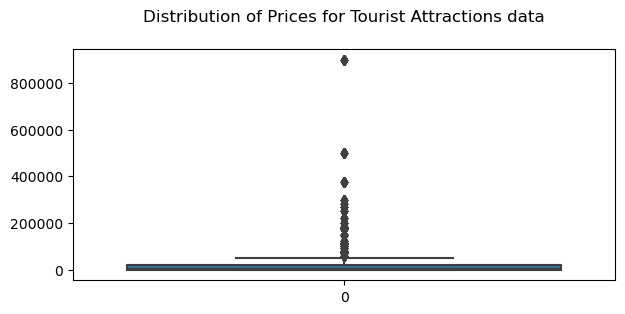

In [202]:
plt.figure(figsize=(7, 3))
sns.boxplot(df['Price'])
plt.title('Distribution of Prices for Tourist Attractions data', pad=20)
plt.show()


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9921 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User_Id        9921 non-null   int64 
 1   Place_Id       9921 non-null   int64 
 2   Place_Ratings  9921 non-null   int64 
 3   Age            9921 non-null   int64 
 4   Place_Name     9921 non-null   object
 5   Description    9921 non-null   object
 6   City           9921 non-null   object
 7   Category       9921 non-null   object
 8   Price          9921 non-null   int64 
 9   user_pref      9921 non-null   int32 
dtypes: int32(1), int64(5), object(4)
memory usage: 1.0+ MB


In [203]:
# Example threshold for considering a rating as high
high_threshold = 3

# Create the user_pref column based on ratings
df['user_interest'] = (df['Place_Ratings'] > high_threshold).astype(int)

# Print the DataFrame to verify the new column
df.head(5)


User_Id  Place_Id  Place_Ratings  Age                     Place_Name  \
0        1       179              3   20                Candi Ratu Boko   
1        1       344              2   20                  Pantai Marina   
2        1         5              5   20       Atlantis Water Adventure   
3        1       373              3   20         Museum Kereta Ambarawa   
4        1       101              4   20  Kampung Wisata Sosro Menduran   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Description  \
0                                                                                                                                                                                                                                                                                       Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ꧀ꦝꦶ​ꦫꦠꦸ​ꦧꦏ, bahasa Jawa: Candhi Ratu Baka) adalah situs purbakala yang merupakan kompleks sejumlah sisa bangunan yang berada kira-kira 3 km di sebelah selatan dari kompleks Candi Prambanan, 18 km sebelah timur Kota Yogyakarta atau 50 km barat daya Kota Surakarta, Jawa Tengah, Indonesia. Situs Ratu Boko terletak di sebuah bukit pada ketinggian 196 meter dari permukaan laut. Luas keseluruhan kompleks adalah sekitar 25 ha.   
1                                                                                                                                                                                                                                                                                 Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, translit. Pasisir Marina) adalah salah satu objek wisata pantai yang berada di kota Semarang, Jawa Tengah. Pantai ini menyimpan pemandangan eksotis khas kota Semarang. Dahulu, tempat ini merupakan hutan bakau dan tambak, tapi pemerintah setempat mengubahnya menjadi tempat rekreasi dengan cara reklamasi daratan. Hasil reklamasi dari hutan bakau ini, sekarang berupa perumahan, pertokoan, dan perkantoran, di sebelah selatan pantai.\r   
2                                                                                                                                                                                                                                                                                                                              Atlantis Water Adventure atau dikenal dengan Atlantis Ancol akan menyuguhkan petualangan wisata air tak terlupakan. Tempat Wisata bertemakan permainan air dengan luas 5 hektar ini memberi sensasi petualangan di 8 kolam utama. Yaitu kolam Antila, Plaza Atlas, Poseidon, Aquarius, Octopus, Kiddy Pool, dan Atlantean. Berlokasi di kawasan Ancol Jakarta Baycity, Atlantis bisa menjadi pilihan destinasi yang pas untuk wisata berenang.   
3                                                                                                                                           Museum Kereta Api Ambarawa (bahasa Inggris: Indonesian Railway Museum, Ambarawa) adalah sebuah stasiun kereta api yang sudah dialihfungsikan menjadi sebuah museum serta merupakan museum perkeretaapian pertama di Indonesia. Museum ini memiliki koleksi kereta api yang pernah berjaya pada zamannya. Museum ini secara administratif berada di Desa Panjang, Ambarawa, Semarang. Museum yang terletak pada k

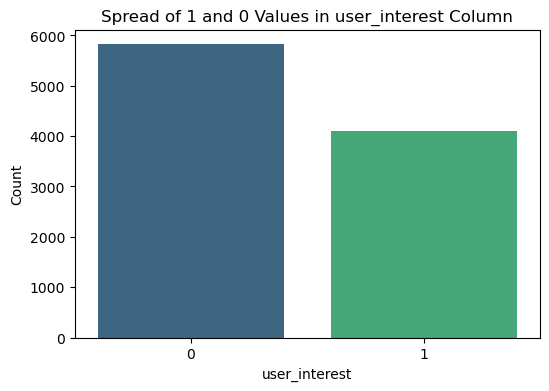

In [173]:
# Plot the distribution of 1 and 0 values in the user_pref column
plt.figure(figsize=(6, 4))
sns.countplot(x='user_interest', data=df, palette='viridis')
plt.title('Spread of 1 and 0 Values in user_interest Column')
plt.xlabel('user_interest')
plt.ylabel('Count')
plt.show()

In [176]:
df.Place_Name.unique()

array(['Candi Ratu Boko', 'Pantai Marina', 'Atlantis Water Adventure',
       'Museum Kereta Ambarawa', 'Kampung Wisata Sosro Menduran',
       'Taman Hutan Raya Ir. H. Juanda', 'Museum Gedung Sate',
       'Museum Taman Prasasti', 'Pantai Ngrawe (Mesra)',
       'Taman Harmoni Keputih', 'Tugu Pal Putih Jogja',
       'Taman Sungai Mudal', 'De Mata Museum Jogja',
       'Surabaya North Quay', 'Museum Bahari Jakarta', 'Grand Maerakaca',
       'Margasatwa Muara Angke', 'Curug Anom',
       'Museum Konferensi Asia Afrika', 'Taman Cattleya',
       'Monumen Bambu Runcing Surabaya', 'Pasar Seni',
       'Curug Tilu Leuwi Opat', 'Museum Mandala Wangsit Siliwangi',
       'Museum Wayang', 'Gua Pawon', 'Perkebunan Teh Malabar',
       'Masjid Pusdai', 'Taman Ismail Marzuki',
       'Bentara Budaya Yogyakarta (BBY)', 'Kota Tua', 'Bukit Jamur',
       'Gereja Katedral', 'Taman Pintar Yogyakarta',
       'Wisata Eling Bening', 'Hutan Kota Srengseng',
       'Puncak Pinus Becici', 'Bangsal Pagela

In [178]:
pip install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   -------------------- ------------------- 41.0/81.9 kB 487.6 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 761.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Logistic Regression to predict user interest

In [293]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=['user_interest'])
y = df['user_interest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoding categorical columns using TargetEncoder since there are many unique values in these category columns so using one hot encoding is not the best approach as we want to avoid having too many featuer columns
# Target encoding captures the relationship between the categorical variable and the target variable.
#It's straightforward to implement and interpret, making it suitable for cases where we don't need to capture semantic relationships(like in sentiments analysis) between categories.

import category_encoders as ce

# Initializing TargetEncoder
target_encoder = ce.TargetEncoder(cols=['Place_Name', 'Description', 'City','Category'])

# Fit and transform the encoder on the training data
X_train_encoded = target_encoder.fit_transform(X_train, y_train)

# Transforming the encoder on the testing data
X_test_encoded = target_encoder.transform(X_test)

# Concatenating encoded features with other numerical columns
X_train_encoded = pd.concat([X_train_encoded, X_train.select_dtypes(include=['int64'])], axis=1)
X_test_encoded = pd.concat([X_test_encoded, X_test.select_dtypes(include=['int64'])], axis=1)


In [294]:
X_test_encoded

User_Id  Place_Id  Place_Ratings  Age  Place_Name  Description  \
5315      161       260              2   33    0.463526     0.463526   
518        17       262              2   31    0.371756     0.371756   
4362      133       191              5   29    0.476574     0.476574   
8447      255       156              1   30    0.374016     0.374016   
9105      274        78              3   38    0.392648     0.392648   
...       ...       ...            ...  ...         ...          ...   
5846      176       264              1   31    0.409488     0.409488   
9279      279       310              2   28    0.397066     0.397066   
3426      105       270              1   37    0.444096     0.444096   
3282      100       102              5   28    0.374016     0.374016   
8316      250       369              4   27    0.353129     0.353129   

          City  Category  Price  User_Id  Place_Id  Place_Ratings  Age  Price  
5315  0.425712  0.409929      0      161       260              2   33      0  
518   0.425712  0.420460  50000       17       262              2   31  50000  
4362  0.431979  0.408873  10000      133       191              5   29  10000  
8447  0.431979  0.408873  10000      255       156              1   30  10000  
9105  0.395547  0.433978   1000      274        78              3   38   1000  
...        ...       ...    ...      ...       ...            ...  ...    ...  
5846  0.425712  0.424242      0      176       264              1   31      0  
9279  0.425712  0.420460      0      279       310              2   28      0  
3426  0.425712  0.420460  25000      105       270              1   37  25000  
3282  0.431979  0.409929  40000      100       102              5   28  40000  
8316  0.414380  0.409929   7500      250       369              4   27   7500  

[1985 rows x 14 columns]

In [265]:
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

# Predictions on the training and test set
y_pred_train = model.predict(X_train_encoded)
y_pred_test = model.predict(X_test_encoded)

# Evaluating performance for both train and test to make sure there is no overfitting or underfitting
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Training Accuracy: 0.8747479838709677
Test Accuracy: 0.8760705289672545
Accuracy: 0.8962216624685139
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1213
           1       0.84      0.91      0.87       772

    accuracy                           0.90      1985
   macro avg       0.89      0.90      0.89      1985
weighted avg       0.90      0.90      0.90      1985



C:\Users\Dhoot\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [191]:
# We see above results the warning for convergence so we can use the below method of scaling and max_iter paramter truning but sometimes it can lead to over fitting which results to accuracy of 100%. So check with data complexity 

from sklearn.preprocessing import StandardScaler

# To mitigate the convergence warning and improve the performance of the logistic regression model. Adjusting the max_iter paramtere and also scaling the data
# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [192]:

# Initializing and training a logistic regression model
model = LogisticRegression()  # Increase max_iter
model.fit(X_train_scaled, y_train)

# Evaluating the model's performance
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1213
           1       1.00      1.00      1.00       772

    accuracy                           1.00      1985
   macro avg       1.00      1.00      1.00      1985
weighted avg       1.00      1.00      1.00      1985



Implementing oneHot encoding method for logistics regression model as we have to perform encoding on the user preference data. Target encoding is useful when we have two parameters - dependent and independt variable as target encoding method replaces each category with the mean of the target variable for that category. And since we do not have target variable in user preference we do need to perform another option which is onehot encoding.

We need always make sure the encoding method on data used for cosinie similarity is always same else there will be - Encoding Mismatch, or Dimensionality Mismatch.

In [259]:
df.columns

Index(['User_Id', 'Place_Id', 'Place_Ratings', 'Age', 'Place_Name',
       'Description', 'City', 'Category', 'Price', 'user_interest'],
      dtype='object')

# Logistic Regression using OneHot Encoding

In [381]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


X = df.drop(columns=['user_interest','Description','User_Id','Place_Id'])
y = df['user_interest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


categorical_cols = ['Place_Name', 'City', 'Category']

# Define the column transformer to apply one-hot encoding to categorical columns
ct = ColumnTransformer(
    [('onehot', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)

# Fit and transform the column transformer on the training data
X_train_encoded = ct.fit_transform(X_train)

# Transform the column transformer on the testing data
X_test_encoded = ct.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

# Predictions on the training and test set
y_pred_train = model.predict(X_train_encoded)
y_pred_test = model.predict(X_test_encoded)

# Evaluating performance for both train and test to make sure there is no overfitting or underfitting
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

# Classification report
print("\nTraining Classification Report:")
print(classification_report(y_train, y_pred_train))

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))

Training Accuracy: 0.8757560483870968
Test Accuracy: 0.8780856423173804

Training Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      4611
           1       0.83      0.88      0.86      3325

    accuracy                           0.88      7936
   macro avg       0.87      0.88      0.87      7936
weighted avg       0.88      0.88      0.88      7936


Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1213
           1       0.81      0.89      0.85       772

    accuracy                           0.88      1985
   macro avg       0.87      0.88      0.87      1985
weighted avg       0.88      0.88      0.88      1985



In [382]:
destination_feature_vectors = X_test_encoded

In [358]:
X_test.columns

Index(['Place_Ratings', 'Age', 'Place_Name', 'City', 'Category', 'Price'], dtype='object')

In [383]:
len(X_test.Place_Name.unique())

435

In [384]:
len(X_test.City.unique())

5

In [385]:
len(X_test.Category.unique())

6

In [386]:
import numpy as np

# Initialize adjusted_destination_feature_vectors with the same shape as destination_feature_vectors
adjusted_destination_feature_vectors = np.zeros_like(destination_feature_vectors.toarray())

# Perform adjustment based on logistic regression predictions
for i, proba in enumerate(y_pred):
    adjusted_destination_feature_vectors[i] = destination_feature_vectors[i].toarray() * proba

In [429]:
adjusted_destination_feature_vectors

array([[0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 5.0e+00, 2.9e+01, 1.0e+04],
       ...,
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 5.0e+00, 2.8e+01, 4.0e+04],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 4.0e+00, 2.7e+01, 7.5e+03]])

In [411]:
from sklearn.decomposition import PCA

# Create PCA object with the desired number of components
pca = PCA(n_components=370)

# Fit PCA to the data and transform the array
reduced_array = pca.fit_transform(adjusted_destination_feature_vectors)

In [430]:
reduced_array

array([[-1.01045349e+04,  1.07205863e+01, -1.00022371e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.01045349e+04,  1.07205863e+01, -1.00022371e-01, ...,
         1.26718839e-15, -1.93882453e-16, -8.22638398e-17],
       [-1.04532528e+02, -1.78818518e+01,  4.62004615e-01, ...,
         1.45563805e-14,  9.30350665e-15,  2.21109346e-11],
       ...,
       [-1.01045349e+04,  1.07205863e+01, -1.00022371e-01, ...,
         1.25852833e-15, -1.35769217e-16,  5.35866924e-17],
       [ 2.98954673e+04, -1.44221068e+01,  6.34446543e-01, ...,
         2.51021467e-14,  7.97703019e-15, -5.03431664e-11],
       [-2.60453270e+03, -1.59604571e+01, -1.24405872e-01, ...,
         4.86850211e-14, -3.22056097e-14, -2.39305849e-14]])

In [453]:
# Load user preference data from CSV
user_preference_data = pd.read_csv('places.csv')

# Assuming 'Place_Name', 'City', and other relevant columns are present in user preference data
user_pref_df = user_preference_data[['User_Id','Place_Name', 'preferred_destination_type', 'preferred_activities', 'Preferred_price']]

user_pref_df.head(5)


User_Id                     Place_Name preferred_destination_type  \
0      179                Candi Ratu Boko            Temple shopping   
1      344                  Pantai Marina        Beaches and resorts   
2        5       Atlantis Water Adventure        Beaches and resorts   
3      373         Museum Kereta Ambarawa   Scenic Spot forest parks   
4      101  Kampung Wisata Sosro Menduran   Scenic Spot forest parks   

                                    preferred_activities  Preferred_price  
0                               Praying shopping reading                0  
1                        Sunbathing water slides boating                0  
2                        Sunbathing water slides boating             3000  
3  Art Exhibition performance rafting Hiking Picknicking             3000  
4  Art Exhibition performance rafting Hiking Picknicking             3000

In [389]:
user_pref_df.isnull().sum()


Place_Name                    0
preferred_destination_type    0
preferred_activities          0
Preferred_price               0
dtype: int64

In [399]:
len(user_pf_df.Place_Name.unique())

437

In [400]:
len(user_pf_df.preferred_destination_type.unique())

10

In [401]:
len(user_pf_df.preferred_activities.unique())

10

In [454]:
us_train, us_test = train_test_split(user_pf_df,test_size=0.2,random_state=42)
categ_col = ['Place_Name', 'preferred_destination_type', 'preferred_activities']
ct0 = ColumnTransformer(
    [('onehot', OneHotEncoder(handle_unknown='ignore'), categ_col)],
    remainder='passthrough'
)

# Fit and transform the column transformer on the training data
us_train_encoded = ct0.fit_transform(us_train)
us_test_encoded = ct0.transform(us_test)

us_test_array = us_test_encoded.toarray()

In [446]:
us_test_array.shape

(88, 370)

In [456]:
us_train.columns

Index(['Place_Name', 'preferred_destination_type', 'preferred_activities',
       'Preferred_price'],
      dtype='object')

In [308]:
user_preference_data.columns

Index(['User_Id', 'Place_Name', 'City', 'Category',
       'preferred_destination_type', 'preferred_activities',
       'Preferred_price'],
      dtype='object')

In [459]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform the scaler on the first array
scaled_reduced_array = scaler.fit_transform(reduced_array)

# Transform the second array using the same scaler
scaled_us_test_array = scaler.transform(us_test_array)

In [460]:
# Calculate cosine similarity between reduced array and encoded user preference data
cosine_similarities = cosine_similarity(scaled_reduced_array, scaled_us_test_array)

# Sort destinations based on cosine similarities
recommended_destinations_indices = np.argsort(cosine_similarities, axis=1)[:, ::-1]

# Display recommended destinations
for i, user_index in enumerate(recommended_destinations_indices):
    print(f"User {i + 1} recommendations:")
    for j, dest_index in enumerate(user_index):
        place_name = us_test.iloc[dest_index]['Place_Name']
        print(f"{j + 1}: {place_name}")
    print()

User 1 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Sewu
4: Candi Ratu Boko
5: Pantai Baron
6: Pantai Nguluran
7: Pantai Jogan
8: Pantai Congot
9: Nol Kilometer Jl.Malioboro
10: Monumen Selamat Datang
11: Masjid Al-Imtizaj
12: Masjid Salman ITB
13: Masjid Raya Bandung
14: Bukit Moko
15: Watu Lumbung
16: Farm House Susu Lembang
17: Wisata Batu Kuda
18: Masjid Agung Ungaran
19: Monumen Sanapati
20: Tebing Breksi
21: Watu Gunung Ungaran
22: Monumen Palagan Ambarawa
23: Masjid Agung Trans Studio Bandung
24: La Kana Chapel
25: Puspa Iptek Sundial
26: Masjid Istiqlal
27: Hutan Pinus Asri
28: Kampung Wisata Kadipaten
29: Kampung Wisata Dipowinatan
30: Jendela Alam
31: Bukit Bintang Yogyakarta
32: Jakarta Aquarium dan Safari
33: Kawah Rengganis Cibuni
34: Taman Suropati
35: Taman Bunga Celosia
36: Taman Cattleya
37: Taman Vanda
38: Taman Flora Bratang Surabaya
39: Taman Harmoni Keputih
40: Ocean Ecopark
41: Taman Lalu Lintas Ade Irma Suryani Nasution
42: Taman Hutan Raya Ir. 

18: Masjid Agung Ungaran
19: Tebing Breksi
20: Nol Kilometer Jl.Malioboro
21: Monumen Palagan Ambarawa
22: Masjid Istiqlal
23: Puspa Iptek Sundial
24: La Kana Chapel
25: Masjid Agung Trans Studio Bandung
26: Watu Gunung Ungaran
27: Jendela Alam
28: Bukit Bintang Yogyakarta
29: Kampung Wisata Dipowinatan
30: Kampung Wisata Kadipaten
31: Jakarta Aquarium dan Safari
32: Hutan Pinus Asri
33: Kawah Rengganis Cibuni
34: Taman Vanda
35: Taman Flora Bratang Surabaya
36: Taman Cattleya
37: Taman Harmoni Keputih
38: Taman Hutan Raya Ir. H. Djuanda
39: Ocean Ecopark
40: Taman Lalu Lintas Ade Irma Suryani Nasution
41: Taman Suropati
42: Taman Bunga Celosia
43: Pulau Pramuka
44: Wisata Kuliner Pecenongan
45: Pulau Bidadari
46: Grand Maerakaca
47: Batununggal Indah Club
48: Kawasan Kuliner BSM
49: Taman Impian Jaya Ancol
50: Taman Pintar Yogyakarta
51: Museum De Javasche Bank
52: Bandros City Tour
53: Gua Pawon
54: Surabaya Museum (Gedung Siola)
55: Desa Wisata Gamplong
56: Setu Babakan
57: Museum S

87: Cibubur Garden Diary (Cibugary)
88: Orchid Forest Cikole

User 73 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Ratu Boko
4: Candi Sewu
5: Pantai Baron
6: Pantai Nguluran
7: Pantai Jogan
8: Pantai Congot
9: Monumen Sanapati
10: Wisata Batu Kuda
11: Masjid Al-Imtizaj
12: Masjid Raya Bandung
13: Bukit Moko
14: Monumen Selamat Datang
15: Watu Lumbung
16: Farm House Susu Lembang
17: Masjid Salman ITB
18: Masjid Agung Ungaran
19: Tebing Breksi
20: Nol Kilometer Jl.Malioboro
21: Monumen Palagan Ambarawa
22: Masjid Istiqlal
23: Puspa Iptek Sundial
24: La Kana Chapel
25: Masjid Agung Trans Studio Bandung
26: Watu Gunung Ungaran
27: Jendela Alam
28: Bukit Bintang Yogyakarta
29: Kampung Wisata Dipowinatan
30: Kampung Wisata Kadipaten
31: Jakarta Aquarium dan Safari
32: Hutan Pinus Asri
33: Kawah Rengganis Cibuni
34: Taman Vanda
35: Taman Flora Bratang Surabaya
36: Taman Cattleya
37: Taman Harmoni Keputih
38: Taman Hutan Raya Ir. H. Djuanda
39: Ocean Ecopark
40: Taman Lalu Li

35: Taman Harmoni Keputih
36: Taman Lalu Lintas Ade Irma Suryani Nasution
37: Taman Vanda
38: Taman Cattleya
39: Taman Hutan Raya Ir. H. Djuanda
40: Ocean Ecopark
41: Taman Suropati
42: Taman Bunga Celosia
43: Batununggal Indah Club
44: Kawasan Kuliner BSM
45: Grand Maerakaca
46: Pulau Pramuka
47: Wisata Kuliner Pecenongan
48: Pulau Bidadari
49: Taman Pintar Yogyakarta
50: Taman Impian Jaya Ancol
51: Lereng Anteng Panoramic Coffee Place
52: Food Junction Grand Pakuwon
53: Green Village Gedangsari
54: Curug Tilu Leuwi Opat
55: Happyfarm Ciwidey
56: Curug Aseupan
57: Kidzania
58: Panghegar Waterboom Bandung
59: Curug Anom
60: Curug Batu Templek
61: Pemandian Air Panas Cimanggu
62: Gua Pawon
63: Semarang Chinatown
64: Museum Wayang
65: Museum Sepuluh Nopember Kota Surabaya
66: Surabaya Museum (Gedung Siola)
67: Desa Wisata Gamplong
68: Museum De Javasche Bank
69: Kawasan Malioboro
70: Museum Fatahillah
71: Wisata Agro Edukatif Istana Susu Cibugary
72: Museum Sri Baduga
73: Museum TNI AL L

45: Pulau Bidadari
46: Grand Maerakaca
47: Batununggal Indah Club
48: Kawasan Kuliner BSM
49: Taman Impian Jaya Ancol
50: Taman Pintar Yogyakarta
51: Museum De Javasche Bank
52: Bandros City Tour
53: Gua Pawon
54: Surabaya Museum (Gedung Siola)
55: Desa Wisata Gamplong
56: Setu Babakan
57: Museum Sepuluh Nopember Kota Surabaya
58: Pemandian Air Panas Cimanggu
59: Semarang Chinatown
60: Museum Wayang
61: Museum Sasmita Loka Ahmad Yani
62: Kawasan Malioboro
63: Taman Budaya Yogyakarta
64: Museum Tengah Kebun
65: Museum Fatahillah
66: Wisata Agro Edukatif Istana Susu Cibugary
67: Museum Sri Baduga
68: Museum TNI AL Loka Jala Crana
69: Tafso Barn
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Green Village Gedangsari
77: Happyfarm Ciwidey
78: Curug Batu Templek
79: Food Junction Grand Pakuwon
80: Kebun Binatang Surabaya
81: Taman Sejarah Bandung
82: Gumuk Pasir Parangkusumo
83: Lawang Sewu
84: Kota

32: Jakarta Aquarium dan Safari
33: Kawah Rengganis Cibuni
34: Taman Suropati
35: Taman Bunga Celosia
36: Taman Cattleya
37: Taman Vanda
38: Taman Flora Bratang Surabaya
39: Taman Harmoni Keputih
40: Ocean Ecopark
41: Taman Lalu Lintas Ade Irma Suryani Nasution
42: Taman Hutan Raya Ir. H. Djuanda
43: Wisata Kuliner Pecenongan
44: Pulau Bidadari
45: Pulau Pramuka
46: Grand Maerakaca
47: Batununggal Indah Club
48: Kawasan Kuliner BSM
49: Taman Impian Jaya Ancol
50: Taman Pintar Yogyakarta
51: Semarang Chinatown
52: Gua Pawon
53: Pemandian Air Panas Cimanggu
54: Museum Sepuluh Nopember Kota Surabaya
55: Surabaya Museum (Gedung Siola)
56: Desa Wisata Gamplong
57: Museum Wayang
58: Kawasan Malioboro
59: Museum Sasmita Loka Ahmad Yani
60: Museum De Javasche Bank
61: Taman Budaya Yogyakarta
62: Tafso Barn
63: Bandros City Tour
64: Wisata Agro Edukatif Istana Susu Cibugary
65: Setu Babakan
66: Museum Sri Baduga
67: Museum Fatahillah
68: Museum Kebangkitan Nasional
69: Museum Tengah Kebun
70: M

71: Curug Tilu Leuwi Opat
72: Panghegar Waterboom Bandung
73: Kidzania
74: Happyfarm Ciwidey
75: Curug Anom
76: Curug Aseupan
77: Green Village Gedangsari
78: Food Junction Grand Pakuwon
79: Curug Batu Templek
80: Kebun Binatang Surabaya
81: Gumuk Pasir Parangkusumo
82: Lawang Sewu
83: Taman Sejarah Bandung
84: Kota Tua
85: Lereng Anteng Panoramic Coffee Place
86: Geoforest Watu Payung Turunan
87: Cibubur Garden Diary (Cibugary)
88: Orchid Forest Cikole

User 231 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Ratu Boko
4: Candi Sewu
5: Pantai Baron
6: Pantai Nguluran
7: Pantai Jogan
8: Pantai Congot
9: Monumen Sanapati
10: Wisata Batu Kuda
11: Masjid Al-Imtizaj
12: Masjid Raya Bandung
13: Bukit Moko
14: Monumen Selamat Datang
15: Watu Lumbung
16: Farm House Susu Lembang
17: Masjid Salman ITB
18: Masjid Agung Ungaran
19: Tebing Breksi
20: Nol Kilometer Jl.Malioboro
21: Monumen Palagan Ambarawa
22: Masjid Istiqlal
23: Puspa Iptek Sundial
24: La Kana Chapel
25: Masjid Agun

51: Kawasan Malioboro
52: Gua Pawon
53: Museum De Javasche Bank
54: Museum Sri Baduga
55: Desa Wisata Gamplong
56: Surabaya Museum (Gedung Siola)
57: Museum Sasmita Loka Ahmad Yani
58: Pemandian Air Panas Cimanggu
59: Semarang Chinatown
60: Museum Wayang
61: Museum Sepuluh Nopember Kota Surabaya
62: Taman Budaya Yogyakarta
63: Bandros City Tour
64: Museum Tengah Kebun
65: Setu Babakan
66: Tafso Barn
67: Wisata Agro Edukatif Istana Susu Cibugary
68: Museum Fatahillah
69: Museum TNI AL Loka Jala Crana
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Happyfarm Ciwidey
77: Green Village Gedangsari
78: Food Junction Grand Pakuwon
79: Curug Batu Templek
80: Kebun Binatang Surabaya
81: Gumuk Pasir Parangkusumo
82: Lawang Sewu
83: Taman Sejarah Bandung
84: Kota Tua
85: Lereng Anteng Panoramic Coffee Place
86: Geoforest Watu Payung Turunan
87: Cibubur Garden Diary (Cibugary)
88: Orchid Forest Cikole

User

71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Green Village Gedangsari
77: Happyfarm Ciwidey
78: Curug Batu Templek
79: Food Junction Grand Pakuwon
80: Kebun Binatang Surabaya
81: Taman Sejarah Bandung
82: Gumuk Pasir Parangkusumo
83: Lawang Sewu
84: Kota Tua
85: Lereng Anteng Panoramic Coffee Place
86: Geoforest Watu Payung Turunan
87: Orchid Forest Cikole
88: Cibubur Garden Diary (Cibugary)

User 305 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Ratu Boko
4: Candi Sewu
5: Pantai Baron
6: Pantai Nguluran
7: Pantai Jogan
8: Pantai Congot
9: Monumen Sanapati
10: Wisata Batu Kuda
11: Masjid Al-Imtizaj
12: Masjid Raya Bandung
13: Bukit Moko
14: Monumen Selamat Datang
15: Watu Lumbung
16: Farm House Susu Lembang
17: Masjid Salman ITB
18: Masjid Agung Ungaran
19: Tebing Breksi
20: Nol Kilometer Jl.Malioboro
21: Monumen Palagan Ambarawa
22: Masjid Istiqlal
23: Puspa Iptek Sundial
24: La Kana Chapel
25: Masjid Agun

55: Desa Wisata Gamplong
56: Setu Babakan
57: Museum Sepuluh Nopember Kota Surabaya
58: Pemandian Air Panas Cimanggu
59: Semarang Chinatown
60: Museum Wayang
61: Museum Sasmita Loka Ahmad Yani
62: Kawasan Malioboro
63: Taman Budaya Yogyakarta
64: Museum Tengah Kebun
65: Museum Fatahillah
66: Wisata Agro Edukatif Istana Susu Cibugary
67: Museum Sri Baduga
68: Museum TNI AL Loka Jala Crana
69: Tafso Barn
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Green Village Gedangsari
77: Happyfarm Ciwidey
78: Curug Batu Templek
79: Food Junction Grand Pakuwon
80: Kebun Binatang Surabaya
81: Taman Sejarah Bandung
82: Gumuk Pasir Parangkusumo
83: Lawang Sewu
84: Kota Tua
85: Lereng Anteng Panoramic Coffee Place
86: Geoforest Watu Payung Turunan
87: Orchid Forest Cikole
88: Cibubur Garden Diary (Cibugary)

User 348 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Ratu Boko
4: Candi Sewu
5: Pant

48: Kawasan Kuliner BSM
49: Taman Impian Jaya Ancol
50: Taman Pintar Yogyakarta
51: Museum De Javasche Bank
52: Bandros City Tour
53: Gua Pawon
54: Surabaya Museum (Gedung Siola)
55: Desa Wisata Gamplong
56: Setu Babakan
57: Museum Sepuluh Nopember Kota Surabaya
58: Pemandian Air Panas Cimanggu
59: Semarang Chinatown
60: Museum Wayang
61: Museum Sasmita Loka Ahmad Yani
62: Kawasan Malioboro
63: Taman Budaya Yogyakarta
64: Museum Tengah Kebun
65: Museum Fatahillah
66: Wisata Agro Edukatif Istana Susu Cibugary
67: Museum Sri Baduga
68: Museum TNI AL Loka Jala Crana
69: Tafso Barn
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Green Village Gedangsari
77: Happyfarm Ciwidey
78: Curug Batu Templek
79: Food Junction Grand Pakuwon
80: Kebun Binatang Surabaya
81: Taman Sejarah Bandung
82: Gumuk Pasir Parangkusumo
83: Lawang Sewu
84: Kota Tua
85: Lereng Anteng Panoramic Coffee Place
86: Geoforest Watu P

88: Orchid Forest Cikole

User 437 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Ratu Boko
4: Candi Sewu
5: Pantai Baron
6: Pantai Nguluran
7: Pantai Jogan
8: Pantai Congot
9: Monumen Sanapati
10: Wisata Batu Kuda
11: Masjid Al-Imtizaj
12: Masjid Raya Bandung
13: Bukit Moko
14: Monumen Selamat Datang
15: Watu Lumbung
16: Farm House Susu Lembang
17: Masjid Salman ITB
18: Masjid Agung Ungaran
19: Tebing Breksi
20: Nol Kilometer Jl.Malioboro
21: Monumen Palagan Ambarawa
22: Masjid Istiqlal
23: Puspa Iptek Sundial
24: La Kana Chapel
25: Masjid Agung Trans Studio Bandung
26: Watu Gunung Ungaran
27: Jendela Alam
28: Bukit Bintang Yogyakarta
29: Kampung Wisata Dipowinatan
30: Kampung Wisata Kadipaten
31: Jakarta Aquarium dan Safari
32: Hutan Pinus Asri
33: Kawah Rengganis Cibuni
34: Taman Vanda
35: Taman Flora Bratang Surabaya
36: Taman Cattleya
37: Taman Harmoni Keputih
38: Taman Hutan Raya Ir. H. Djuanda
39: Ocean Ecopark
40: Taman Lalu Lintas Ade Irma Suryani Nasution
41: 

31: Bukit Bintang Yogyakarta
32: Jakarta Aquarium dan Safari
33: Kawah Rengganis Cibuni
34: Taman Suropati
35: Taman Bunga Celosia
36: Taman Cattleya
37: Taman Vanda
38: Taman Flora Bratang Surabaya
39: Taman Harmoni Keputih
40: Ocean Ecopark
41: Taman Lalu Lintas Ade Irma Suryani Nasution
42: Taman Hutan Raya Ir. H. Djuanda
43: Wisata Kuliner Pecenongan
44: Pulau Bidadari
45: Pulau Pramuka
46: Grand Maerakaca
47: Batununggal Indah Club
48: Kawasan Kuliner BSM
49: Taman Impian Jaya Ancol
50: Taman Pintar Yogyakarta
51: Semarang Chinatown
52: Gua Pawon
53: Pemandian Air Panas Cimanggu
54: Museum Sepuluh Nopember Kota Surabaya
55: Surabaya Museum (Gedung Siola)
56: Desa Wisata Gamplong
57: Museum Wayang
58: Kawasan Malioboro
59: Museum Sasmita Loka Ahmad Yani
60: Museum De Javasche Bank
61: Taman Budaya Yogyakarta
62: Tafso Barn
63: Bandros City Tour
64: Wisata Agro Edukatif Istana Susu Cibugary
65: Setu Babakan
66: Museum Sri Baduga
67: Museum Fatahillah
68: Museum Kebangkitan Nasional


8: Pantai Congot
9: Monumen Sanapati
10: Wisata Batu Kuda
11: Masjid Al-Imtizaj
12: Masjid Raya Bandung
13: Bukit Moko
14: Monumen Selamat Datang
15: Watu Lumbung
16: Farm House Susu Lembang
17: Masjid Salman ITB
18: Masjid Agung Ungaran
19: Tebing Breksi
20: Nol Kilometer Jl.Malioboro
21: Monumen Palagan Ambarawa
22: Masjid Istiqlal
23: Puspa Iptek Sundial
24: La Kana Chapel
25: Masjid Agung Trans Studio Bandung
26: Watu Gunung Ungaran
27: Jendela Alam
28: Bukit Bintang Yogyakarta
29: Kampung Wisata Dipowinatan
30: Kampung Wisata Kadipaten
31: Jakarta Aquarium dan Safari
32: Hutan Pinus Asri
33: Kawah Rengganis Cibuni
34: Taman Vanda
35: Taman Flora Bratang Surabaya
36: Taman Cattleya
37: Taman Harmoni Keputih
38: Taman Hutan Raya Ir. H. Djuanda
39: Ocean Ecopark
40: Taman Lalu Lintas Ade Irma Suryani Nasution
41: Taman Suropati
42: Taman Bunga Celosia
43: Pulau Pramuka
44: Wisata Kuliner Pecenongan
45: Pulau Bidadari
46: Grand Maerakaca
47: Batununggal Indah Club
48: Kawasan Kuliner 

87: Cibubur Garden Diary (Cibugary)
88: Orchid Forest Cikole

User 563 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Ratu Boko
4: Candi Sewu
5: Pantai Baron
6: Pantai Nguluran
7: Pantai Jogan
8: Pantai Congot
9: Monumen Sanapati
10: Wisata Batu Kuda
11: Masjid Al-Imtizaj
12: Masjid Raya Bandung
13: Bukit Moko
14: Monumen Selamat Datang
15: Watu Lumbung
16: Farm House Susu Lembang
17: Masjid Salman ITB
18: Masjid Agung Ungaran
19: Tebing Breksi
20: Nol Kilometer Jl.Malioboro
21: Monumen Palagan Ambarawa
22: Masjid Istiqlal
23: Puspa Iptek Sundial
24: La Kana Chapel
25: Masjid Agung Trans Studio Bandung
26: Watu Gunung Ungaran
27: Jendela Alam
28: Bukit Bintang Yogyakarta
29: Kampung Wisata Dipowinatan
30: Kampung Wisata Kadipaten
31: Jakarta Aquarium dan Safari
32: Hutan Pinus Asri
33: Kawah Rengganis Cibuni
34: Taman Vanda
35: Taman Flora Bratang Surabaya
36: Taman Cattleya
37: Taman Harmoni Keputih
38: Taman Hutan Raya Ir. H. Djuanda
39: Ocean Ecopark
40: Taman Lalu L

22: Masjid Istiqlal
23: Puspa Iptek Sundial
24: La Kana Chapel
25: Masjid Agung Trans Studio Bandung
26: Watu Gunung Ungaran
27: Jendela Alam
28: Bukit Bintang Yogyakarta
29: Kampung Wisata Dipowinatan
30: Kampung Wisata Kadipaten
31: Jakarta Aquarium dan Safari
32: Hutan Pinus Asri
33: Kawah Rengganis Cibuni
34: Taman Vanda
35: Taman Flora Bratang Surabaya
36: Taman Cattleya
37: Taman Harmoni Keputih
38: Taman Hutan Raya Ir. H. Djuanda
39: Ocean Ecopark
40: Taman Lalu Lintas Ade Irma Suryani Nasution
41: Taman Suropati
42: Taman Bunga Celosia
43: Pulau Pramuka
44: Wisata Kuliner Pecenongan
45: Pulau Bidadari
46: Grand Maerakaca
47: Batununggal Indah Club
48: Kawasan Kuliner BSM
49: Taman Impian Jaya Ancol
50: Taman Pintar Yogyakarta
51: Museum De Javasche Bank
52: Bandros City Tour
53: Gua Pawon
54: Surabaya Museum (Gedung Siola)
55: Desa Wisata Gamplong
56: Setu Babakan
57: Museum Sepuluh Nopember Kota Surabaya
58: Pemandian Air Panas Cimanggu
59: Semarang Chinatown
60: Museum Wayang

52: Bandros City Tour
53: Gua Pawon
54: Surabaya Museum (Gedung Siola)
55: Desa Wisata Gamplong
56: Setu Babakan
57: Museum Sepuluh Nopember Kota Surabaya
58: Pemandian Air Panas Cimanggu
59: Semarang Chinatown
60: Museum Wayang
61: Museum Sasmita Loka Ahmad Yani
62: Kawasan Malioboro
63: Taman Budaya Yogyakarta
64: Museum Tengah Kebun
65: Museum Fatahillah
66: Wisata Agro Edukatif Istana Susu Cibugary
67: Museum Sri Baduga
68: Museum TNI AL Loka Jala Crana
69: Tafso Barn
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Green Village Gedangsari
77: Happyfarm Ciwidey
78: Curug Batu Templek
79: Food Junction Grand Pakuwon
80: Kebun Binatang Surabaya
81: Taman Sejarah Bandung
82: Gumuk Pasir Parangkusumo
83: Lawang Sewu
84: Kota Tua
85: Lereng Anteng Panoramic Coffee Place
86: Geoforest Watu Payung Turunan
87: Orchid Forest Cikole
88: Cibubur Garden Diary (Cibugary)

User 647 recommendations:
1: Ben

47: Batununggal Indah Club
48: Kawasan Kuliner BSM
49: Taman Impian Jaya Ancol
50: Taman Pintar Yogyakarta
51: Semarang Chinatown
52: Gua Pawon
53: Pemandian Air Panas Cimanggu
54: Museum Sepuluh Nopember Kota Surabaya
55: Surabaya Museum (Gedung Siola)
56: Desa Wisata Gamplong
57: Museum Wayang
58: Kawasan Malioboro
59: Museum Sasmita Loka Ahmad Yani
60: Museum De Javasche Bank
61: Taman Budaya Yogyakarta
62: Tafso Barn
63: Bandros City Tour
64: Wisata Agro Edukatif Istana Susu Cibugary
65: Setu Babakan
66: Museum Sri Baduga
67: Museum Fatahillah
68: Museum Kebangkitan Nasional
69: Museum Tengah Kebun
70: Museum TNI AL Loka Jala Crana
71: Curug Tilu Leuwi Opat
72: Panghegar Waterboom Bandung
73: Kidzania
74: Happyfarm Ciwidey
75: Curug Anom
76: Curug Aseupan
77: Green Village Gedangsari
78: Food Junction Grand Pakuwon
79: Curug Batu Templek
80: Kebun Binatang Surabaya
81: Gumuk Pasir Parangkusumo
82: Lawang Sewu
83: Taman Sejarah Bandung
84: Kota Tua
85: Lereng Anteng Panoramic Coffee

60: Museum Wayang
61: Museum Sasmita Loka Ahmad Yani
62: Kawasan Malioboro
63: Taman Budaya Yogyakarta
64: Museum Tengah Kebun
65: Museum Fatahillah
66: Wisata Agro Edukatif Istana Susu Cibugary
67: Museum Sri Baduga
68: Museum TNI AL Loka Jala Crana
69: Tafso Barn
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Green Village Gedangsari
77: Happyfarm Ciwidey
78: Curug Batu Templek
79: Food Junction Grand Pakuwon
80: Kebun Binatang Surabaya
81: Taman Sejarah Bandung
82: Gumuk Pasir Parangkusumo
83: Lawang Sewu
84: Kota Tua
85: Lereng Anteng Panoramic Coffee Place
86: Geoforest Watu Payung Turunan
87: Orchid Forest Cikole
88: Cibubur Garden Diary (Cibugary)

User 732 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Ratu Boko
4: Candi Sewu
5: Pantai Baron
6: Pantai Nguluran
7: Pantai Jogan
8: Pantai Congot
9: Monumen Sanapati
10: Wisata Batu Kuda
11: Masjid Al-Imtizaj
12: Masjid Raya 

17: Masjid Salman ITB
18: Masjid Agung Ungaran
19: Tebing Breksi
20: Nol Kilometer Jl.Malioboro
21: Monumen Palagan Ambarawa
22: Masjid Istiqlal
23: Puspa Iptek Sundial
24: La Kana Chapel
25: Masjid Agung Trans Studio Bandung
26: Watu Gunung Ungaran
27: Jendela Alam
28: Bukit Bintang Yogyakarta
29: Kampung Wisata Dipowinatan
30: Kampung Wisata Kadipaten
31: Jakarta Aquarium dan Safari
32: Hutan Pinus Asri
33: Kawah Rengganis Cibuni
34: Taman Vanda
35: Taman Flora Bratang Surabaya
36: Taman Cattleya
37: Taman Harmoni Keputih
38: Taman Hutan Raya Ir. H. Djuanda
39: Ocean Ecopark
40: Taman Lalu Lintas Ade Irma Suryani Nasution
41: Taman Suropati
42: Taman Bunga Celosia
43: Pulau Pramuka
44: Wisata Kuliner Pecenongan
45: Pulau Bidadari
46: Grand Maerakaca
47: Batununggal Indah Club
48: Kawasan Kuliner BSM
49: Taman Impian Jaya Ancol
50: Taman Pintar Yogyakarta
51: Museum De Javasche Bank
52: Bandros City Tour
53: Gua Pawon
54: Surabaya Museum (Gedung Siola)
55: Desa Wisata Gamplong
56: Set

8: Pantai Congot
9: Nol Kilometer Jl.Malioboro
10: Monumen Selamat Datang
11: Masjid Al-Imtizaj
12: Masjid Salman ITB
13: Masjid Raya Bandung
14: Bukit Moko
15: Watu Lumbung
16: Farm House Susu Lembang
17: Wisata Batu Kuda
18: Masjid Agung Ungaran
19: Monumen Sanapati
20: Tebing Breksi
21: Watu Gunung Ungaran
22: Monumen Palagan Ambarawa
23: Masjid Agung Trans Studio Bandung
24: La Kana Chapel
25: Puspa Iptek Sundial
26: Masjid Istiqlal
27: Hutan Pinus Asri
28: Kampung Wisata Kadipaten
29: Kampung Wisata Dipowinatan
30: Jendela Alam
31: Bukit Bintang Yogyakarta
32: Jakarta Aquarium dan Safari
33: Kawah Rengganis Cibuni
34: Taman Suropati
35: Taman Bunga Celosia
36: Taman Cattleya
37: Taman Vanda
38: Taman Flora Bratang Surabaya
39: Taman Harmoni Keputih
40: Ocean Ecopark
41: Taman Lalu Lintas Ade Irma Suryani Nasution
42: Taman Hutan Raya Ir. H. Djuanda
43: Wisata Kuliner Pecenongan
44: Pulau Bidadari
45: Pulau Pramuka
46: Grand Maerakaca
47: Batununggal Indah Club
48: Kawasan Kuliner 

36: Taman Cattleya
37: Taman Harmoni Keputih
38: Taman Hutan Raya Ir. H. Djuanda
39: Ocean Ecopark
40: Taman Lalu Lintas Ade Irma Suryani Nasution
41: Taman Suropati
42: Taman Bunga Celosia
43: Pulau Pramuka
44: Wisata Kuliner Pecenongan
45: Pulau Bidadari
46: Grand Maerakaca
47: Batununggal Indah Club
48: Kawasan Kuliner BSM
49: Taman Impian Jaya Ancol
50: Taman Pintar Yogyakarta
51: Museum De Javasche Bank
52: Bandros City Tour
53: Gua Pawon
54: Surabaya Museum (Gedung Siola)
55: Desa Wisata Gamplong
56: Setu Babakan
57: Museum Sepuluh Nopember Kota Surabaya
58: Pemandian Air Panas Cimanggu
59: Semarang Chinatown
60: Museum Wayang
61: Museum Sasmita Loka Ahmad Yani
62: Kawasan Malioboro
63: Taman Budaya Yogyakarta
64: Museum Tengah Kebun
65: Museum Fatahillah
66: Wisata Agro Edukatif Istana Susu Cibugary
67: Museum Sri Baduga
68: Museum TNI AL Loka Jala Crana
69: Tafso Barn
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
7

12: Masjid Raya Bandung
13: Bukit Moko
14: Monumen Selamat Datang
15: Watu Lumbung
16: Farm House Susu Lembang
17: Masjid Salman ITB
18: Masjid Agung Ungaran
19: Tebing Breksi
20: Nol Kilometer Jl.Malioboro
21: Monumen Palagan Ambarawa
22: Masjid Istiqlal
23: Puspa Iptek Sundial
24: La Kana Chapel
25: Masjid Agung Trans Studio Bandung
26: Watu Gunung Ungaran
27: Jendela Alam
28: Bukit Bintang Yogyakarta
29: Kampung Wisata Dipowinatan
30: Kampung Wisata Kadipaten
31: Jakarta Aquarium dan Safari
32: Hutan Pinus Asri
33: Kawah Rengganis Cibuni
34: Taman Vanda
35: Taman Flora Bratang Surabaya
36: Taman Cattleya
37: Taman Harmoni Keputih
38: Taman Hutan Raya Ir. H. Djuanda
39: Ocean Ecopark
40: Taman Lalu Lintas Ade Irma Suryani Nasution
41: Taman Suropati
42: Taman Bunga Celosia
43: Pulau Pramuka
44: Wisata Kuliner Pecenongan
45: Pulau Bidadari
46: Grand Maerakaca
47: Batununggal Indah Club
48: Kawasan Kuliner BSM
49: Taman Impian Jaya Ancol
50: Taman Pintar Yogyakarta
51: Museum De Javasc

21: Monumen Palagan Ambarawa
22: Masjid Istiqlal
23: Puspa Iptek Sundial
24: La Kana Chapel
25: Masjid Agung Trans Studio Bandung
26: Watu Gunung Ungaran
27: Jendela Alam
28: Bukit Bintang Yogyakarta
29: Kampung Wisata Dipowinatan
30: Kampung Wisata Kadipaten
31: Jakarta Aquarium dan Safari
32: Hutan Pinus Asri
33: Kawah Rengganis Cibuni
34: Taman Vanda
35: Taman Flora Bratang Surabaya
36: Taman Cattleya
37: Taman Harmoni Keputih
38: Taman Hutan Raya Ir. H. Djuanda
39: Ocean Ecopark
40: Taman Lalu Lintas Ade Irma Suryani Nasution
41: Taman Suropati
42: Taman Bunga Celosia
43: Pulau Pramuka
44: Wisata Kuliner Pecenongan
45: Pulau Bidadari
46: Grand Maerakaca
47: Batununggal Indah Club
48: Kawasan Kuliner BSM
49: Taman Impian Jaya Ancol
50: Taman Pintar Yogyakarta
51: Museum De Javasche Bank
52: Bandros City Tour
53: Gua Pawon
54: Surabaya Museum (Gedung Siola)
55: Desa Wisata Gamplong
56: Setu Babakan
57: Museum Sepuluh Nopember Kota Surabaya
58: Pemandian Air Panas Cimanggu
59: Semaran

81: Taman Sejarah Bandung
82: Gumuk Pasir Parangkusumo
83: Lawang Sewu
84: Kota Tua
85: Lereng Anteng Panoramic Coffee Place
86: Geoforest Watu Payung Turunan
87: Orchid Forest Cikole
88: Cibubur Garden Diary (Cibugary)

User 995 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Ratu Boko
4: Candi Sewu
5: Pantai Baron
6: Pantai Nguluran
7: Pantai Jogan
8: Pantai Congot
9: Monumen Sanapati
10: Wisata Batu Kuda
11: Masjid Al-Imtizaj
12: Masjid Raya Bandung
13: Monumen Selamat Datang
14: Bukit Moko
15: Watu Lumbung
16: Nol Kilometer Jl.Malioboro
17: Masjid Salman ITB
18: Masjid Agung Ungaran
19: Tebing Breksi
20: Farm House Susu Lembang
21: Masjid Agung Trans Studio Bandung
22: Masjid Istiqlal
23: Puspa Iptek Sundial
24: La Kana Chapel
25: Watu Gunung Ungaran
26: Monumen Palagan Ambarawa
27: Bukit Bintang Yogyakarta
28: Jendela Alam
29: Kampung Wisata Dipowinatan
30: Hutan Pinus Asri
31: Kampung Wisata Kadipaten
32: Jakarta Aquarium dan Safari
33: Kawah Rengganis Cibuni
34: T

27: Hutan Pinus Asri
28: Kampung Wisata Kadipaten
29: Kampung Wisata Dipowinatan
30: Jendela Alam
31: Bukit Bintang Yogyakarta
32: Jakarta Aquarium dan Safari
33: Kawah Rengganis Cibuni
34: Taman Suropati
35: Taman Bunga Celosia
36: Taman Cattleya
37: Taman Vanda
38: Taman Flora Bratang Surabaya
39: Taman Harmoni Keputih
40: Ocean Ecopark
41: Taman Lalu Lintas Ade Irma Suryani Nasution
42: Taman Hutan Raya Ir. H. Djuanda
43: Wisata Kuliner Pecenongan
44: Pulau Bidadari
45: Pulau Pramuka
46: Grand Maerakaca
47: Batununggal Indah Club
48: Kawasan Kuliner BSM
49: Taman Impian Jaya Ancol
50: Taman Pintar Yogyakarta
51: Semarang Chinatown
52: Gua Pawon
53: Pemandian Air Panas Cimanggu
54: Museum Sepuluh Nopember Kota Surabaya
55: Surabaya Museum (Gedung Siola)
56: Desa Wisata Gamplong
57: Museum Wayang
58: Kawasan Malioboro
59: Museum Sasmita Loka Ahmad Yani
60: Museum De Javasche Bank
61: Taman Budaya Yogyakarta
62: Tafso Barn
63: Bandros City Tour
64: Wisata Agro Edukatif Istana Susu Cibu

58: Pemandian Air Panas Cimanggu
59: Semarang Chinatown
60: Museum Wayang
61: Museum Sasmita Loka Ahmad Yani
62: Kawasan Malioboro
63: Taman Budaya Yogyakarta
64: Museum Tengah Kebun
65: Museum Fatahillah
66: Wisata Agro Edukatif Istana Susu Cibugary
67: Museum Sri Baduga
68: Museum TNI AL Loka Jala Crana
69: Tafso Barn
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Green Village Gedangsari
77: Happyfarm Ciwidey
78: Curug Batu Templek
79: Food Junction Grand Pakuwon
80: Kebun Binatang Surabaya
81: Taman Sejarah Bandung
82: Gumuk Pasir Parangkusumo
83: Lawang Sewu
84: Kota Tua
85: Lereng Anteng Panoramic Coffee Place
86: Geoforest Watu Payung Turunan
87: Orchid Forest Cikole
88: Cibubur Garden Diary (Cibugary)

User 1085 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Sewu
4: Candi Ratu Boko
5: Pantai Baron
6: Pantai Nguluran
7: Pantai Jogan
8: Pantai Congot
9: Nol Kilometer Jl.Ma

54: Museum Sri Baduga
55: Desa Wisata Gamplong
56: Surabaya Museum (Gedung Siola)
57: Museum Sasmita Loka Ahmad Yani
58: Pemandian Air Panas Cimanggu
59: Semarang Chinatown
60: Museum Wayang
61: Museum Sepuluh Nopember Kota Surabaya
62: Taman Budaya Yogyakarta
63: Bandros City Tour
64: Museum Tengah Kebun
65: Setu Babakan
66: Tafso Barn
67: Wisata Agro Edukatif Istana Susu Cibugary
68: Museum Fatahillah
69: Museum TNI AL Loka Jala Crana
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Happyfarm Ciwidey
77: Green Village Gedangsari
78: Food Junction Grand Pakuwon
79: Curug Batu Templek
80: Kebun Binatang Surabaya
81: Gumuk Pasir Parangkusumo
82: Lawang Sewu
83: Taman Sejarah Bandung
84: Kota Tua
85: Lereng Anteng Panoramic Coffee Place
86: Geoforest Watu Payung Turunan
87: Cibubur Garden Diary (Cibugary)
88: Orchid Forest Cikole

User 1129 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: C

65: Setu Babakan
66: Tafso Barn
67: Wisata Agro Edukatif Istana Susu Cibugary
68: Museum Fatahillah
69: Museum TNI AL Loka Jala Crana
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Happyfarm Ciwidey
77: Green Village Gedangsari
78: Food Junction Grand Pakuwon
79: Curug Batu Templek
80: Kebun Binatang Surabaya
81: Gumuk Pasir Parangkusumo
82: Lawang Sewu
83: Taman Sejarah Bandung
84: Kota Tua
85: Lereng Anteng Panoramic Coffee Place
86: Geoforest Watu Payung Turunan
87: Cibubur Garden Diary (Cibugary)
88: Orchid Forest Cikole

User 1167 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Ratu Boko
4: Candi Sewu
5: Pantai Baron
6: Pantai Nguluran
7: Pantai Jogan
8: Pantai Congot
9: Monumen Sanapati
10: Wisata Batu Kuda
11: Masjid Al-Imtizaj
12: Masjid Raya Bandung
13: Bukit Moko
14: Monumen Selamat Datang
15: Watu Lumbung
16: Farm House Susu Lembang
17: Masjid Salman ITB
18: Masjid Agu

59: Semarang Chinatown
60: Museum Wayang
61: Museum Sepuluh Nopember Kota Surabaya
62: Taman Budaya Yogyakarta
63: Bandros City Tour
64: Museum Tengah Kebun
65: Setu Babakan
66: Tafso Barn
67: Wisata Agro Edukatif Istana Susu Cibugary
68: Museum Fatahillah
69: Museum TNI AL Loka Jala Crana
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Happyfarm Ciwidey
77: Green Village Gedangsari
78: Food Junction Grand Pakuwon
79: Curug Batu Templek
80: Kebun Binatang Surabaya
81: Gumuk Pasir Parangkusumo
82: Lawang Sewu
83: Taman Sejarah Bandung
84: Kota Tua
85: Lereng Anteng Panoramic Coffee Place
86: Geoforest Watu Payung Turunan
87: Cibubur Garden Diary (Cibugary)
88: Orchid Forest Cikole

User 1206 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Ratu Boko
4: Candi Sewu
5: Pantai Baron
6: Pantai Nguluran
7: Pantai Jogan
8: Pantai Congot
9: Monumen Sanapati
10: Wisata Batu Kuda
11: Masjid A

43: Pulau Pramuka
44: Wisata Kuliner Pecenongan
45: Pulau Bidadari
46: Grand Maerakaca
47: Batununggal Indah Club
48: Kawasan Kuliner BSM
49: Taman Impian Jaya Ancol
50: Taman Pintar Yogyakarta
51: Museum De Javasche Bank
52: Bandros City Tour
53: Gua Pawon
54: Surabaya Museum (Gedung Siola)
55: Desa Wisata Gamplong
56: Setu Babakan
57: Museum Sepuluh Nopember Kota Surabaya
58: Pemandian Air Panas Cimanggu
59: Semarang Chinatown
60: Museum Wayang
61: Museum Sasmita Loka Ahmad Yani
62: Kawasan Malioboro
63: Taman Budaya Yogyakarta
64: Museum Tengah Kebun
65: Museum Fatahillah
66: Wisata Agro Edukatif Istana Susu Cibugary
67: Museum Sri Baduga
68: Museum TNI AL Loka Jala Crana
69: Tafso Barn
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Green Village Gedangsari
77: Happyfarm Ciwidey
78: Curug Batu Templek
79: Food Junction Grand Pakuwon
80: Kebun Binatang Surabaya
81: Taman Sejarah Bandung
82: G

61: Taman Budaya Yogyakarta
62: Tafso Barn
63: Bandros City Tour
64: Wisata Agro Edukatif Istana Susu Cibugary
65: Setu Babakan
66: Museum Sri Baduga
67: Museum Fatahillah
68: Museum Kebangkitan Nasional
69: Museum Tengah Kebun
70: Museum TNI AL Loka Jala Crana
71: Curug Tilu Leuwi Opat
72: Panghegar Waterboom Bandung
73: Kidzania
74: Happyfarm Ciwidey
75: Curug Anom
76: Curug Aseupan
77: Green Village Gedangsari
78: Food Junction Grand Pakuwon
79: Curug Batu Templek
80: Kebun Binatang Surabaya
81: Gumuk Pasir Parangkusumo
82: Lawang Sewu
83: Taman Sejarah Bandung
84: Kota Tua
85: Lereng Anteng Panoramic Coffee Place
86: Geoforest Watu Payung Turunan
87: Cibubur Garden Diary (Cibugary)
88: Orchid Forest Cikole

User 1282 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Ratu Boko
4: Candi Sewu
5: Pantai Baron
6: Pantai Nguluran
7: Pantai Jogan
8: Pantai Congot
9: Monumen Sanapati
10: Wisata Batu Kuda
11: Masjid Al-Imtizaj
12: Masjid Raya Bandung
13: Bukit Moko
14: Monumen 

11: Hutan Pinus Asri
12: Jakarta Aquarium dan Safari
13: Bukit Bintang Yogyakarta
14: Jendela Alam
15: Kawah Rengganis Cibuni
16: Monumen Selamat Datang
17: Masjid Raya Bandung
18: Nol Kilometer Jl.Malioboro
19: Farm House Susu Lembang
20: Wisata Batu Kuda
21: Masjid Salman ITB
22: Masjid Agung Ungaran
23: Bukit Moko
24: Watu Lumbung
25: Masjid Al-Imtizaj
26: Tebing Breksi
27: Watu Gunung Ungaran
28: Monumen Palagan Ambarawa
29: Masjid Agung Trans Studio Bandung
30: La Kana Chapel
31: Puspa Iptek Sundial
32: Masjid Istiqlal
33: Monumen Sanapati
34: Taman Suropati
35: Taman Bunga Celosia
36: Taman Cattleya
37: Taman Lalu Lintas Ade Irma Suryani Nasution
38: Ocean Ecopark
39: Taman Harmoni Keputih
40: Taman Flora Bratang Surabaya
41: Taman Hutan Raya Ir. H. Djuanda
42: Taman Vanda
43: Grand Maerakaca
44: Batununggal Indah Club
45: Kawasan Kuliner BSM
46: Pulau Bidadari
47: Wisata Kuliner Pecenongan
48: Pulau Pramuka
49: Taman Impian Jaya Ancol
50: Taman Pintar Yogyakarta
51: Lawang Sewu


52: Gua Pawon
53: Museum De Javasche Bank
54: Museum Sri Baduga
55: Desa Wisata Gamplong
56: Surabaya Museum (Gedung Siola)
57: Museum Sasmita Loka Ahmad Yani
58: Pemandian Air Panas Cimanggu
59: Semarang Chinatown
60: Museum Wayang
61: Museum Sepuluh Nopember Kota Surabaya
62: Taman Budaya Yogyakarta
63: Bandros City Tour
64: Museum Tengah Kebun
65: Setu Babakan
66: Tafso Barn
67: Wisata Agro Edukatif Istana Susu Cibugary
68: Museum Fatahillah
69: Museum TNI AL Loka Jala Crana
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Happyfarm Ciwidey
77: Green Village Gedangsari
78: Food Junction Grand Pakuwon
79: Curug Batu Templek
80: Kebun Binatang Surabaya
81: Gumuk Pasir Parangkusumo
82: Lawang Sewu
83: Taman Sejarah Bandung
84: Kota Tua
85: Lereng Anteng Panoramic Coffee Place
86: Geoforest Watu Payung Turunan
87: Cibubur Garden Diary (Cibugary)
88: Orchid Forest Cikole

User 1357 recommendations:

45: Pulau Bidadari
46: Grand Maerakaca
47: Batununggal Indah Club
48: Kawasan Kuliner BSM
49: Taman Impian Jaya Ancol
50: Taman Pintar Yogyakarta
51: Museum De Javasche Bank
52: Bandros City Tour
53: Gua Pawon
54: Surabaya Museum (Gedung Siola)
55: Desa Wisata Gamplong
56: Setu Babakan
57: Museum Sepuluh Nopember Kota Surabaya
58: Pemandian Air Panas Cimanggu
59: Semarang Chinatown
60: Museum Wayang
61: Museum Sasmita Loka Ahmad Yani
62: Kawasan Malioboro
63: Taman Budaya Yogyakarta
64: Museum Tengah Kebun
65: Museum Fatahillah
66: Wisata Agro Edukatif Istana Susu Cibugary
67: Museum Sri Baduga
68: Museum TNI AL Loka Jala Crana
69: Tafso Barn
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Green Village Gedangsari
77: Happyfarm Ciwidey
78: Curug Batu Templek
79: Food Junction Grand Pakuwon
80: Kebun Binatang Surabaya
81: Taman Sejarah Bandung
82: Gumuk Pasir Parangkusumo
83: Lawang Sewu
84: Kota

61: Museum Sasmita Loka Ahmad Yani
62: Kawasan Malioboro
63: Taman Budaya Yogyakarta
64: Museum Tengah Kebun
65: Museum Fatahillah
66: Wisata Agro Edukatif Istana Susu Cibugary
67: Museum Sri Baduga
68: Museum TNI AL Loka Jala Crana
69: Tafso Barn
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Green Village Gedangsari
77: Happyfarm Ciwidey
78: Curug Batu Templek
79: Food Junction Grand Pakuwon
80: Kebun Binatang Surabaya
81: Taman Sejarah Bandung
82: Gumuk Pasir Parangkusumo
83: Lawang Sewu
84: Kota Tua
85: Lereng Anteng Panoramic Coffee Place
86: Geoforest Watu Payung Turunan
87: Orchid Forest Cikole
88: Cibubur Garden Diary (Cibugary)

User 1444 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Ratu Boko
4: Candi Sewu
5: Pantai Baron
6: Pantai Nguluran
7: Pantai Jogan
8: Pantai Congot
9: Monumen Sanapati
10: Wisata Batu Kuda
11: Masjid Al-Imtizaj
12: Masjid Raya Bandung
13: Bukit

67: Museum Sri Baduga
68: Museum TNI AL Loka Jala Crana
69: Tafso Barn
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Green Village Gedangsari
77: Happyfarm Ciwidey
78: Curug Batu Templek
79: Food Junction Grand Pakuwon
80: Kebun Binatang Surabaya
81: Taman Sejarah Bandung
82: Gumuk Pasir Parangkusumo
83: Lawang Sewu
84: Kota Tua
85: Lereng Anteng Panoramic Coffee Place
86: Geoforest Watu Payung Turunan
87: Orchid Forest Cikole
88: Cibubur Garden Diary (Cibugary)

User 1485 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Sewu
4: Candi Ratu Boko
5: Pantai Baron
6: Pantai Nguluran
7: Pantai Jogan
8: Pantai Congot
9: Nol Kilometer Jl.Malioboro
10: Monumen Selamat Datang
11: Masjid Al-Imtizaj
12: Masjid Salman ITB
13: Masjid Raya Bandung
14: Bukit Moko
15: Watu Lumbung
16: Farm House Susu Lembang
17: Wisata Batu Kuda
18: Masjid Agung Ungaran
19: Monumen Sanapati
20: Tebing Breksi
21:

69: Tafso Barn
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Green Village Gedangsari
77: Happyfarm Ciwidey
78: Curug Batu Templek
79: Food Junction Grand Pakuwon
80: Kebun Binatang Surabaya
81: Taman Sejarah Bandung
82: Gumuk Pasir Parangkusumo
83: Lawang Sewu
84: Kota Tua
85: Lereng Anteng Panoramic Coffee Place
86: Geoforest Watu Payung Turunan
87: Orchid Forest Cikole
88: Cibubur Garden Diary (Cibugary)

User 1525 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Ratu Boko
4: Candi Sewu
5: Pantai Baron
6: Pantai Nguluran
7: Pantai Jogan
8: Pantai Congot
9: Monumen Sanapati
10: Wisata Batu Kuda
11: Masjid Al-Imtizaj
12: Masjid Raya Bandung
13: Bukit Moko
14: Monumen Selamat Datang
15: Watu Lumbung
16: Farm House Susu Lembang
17: Masjid Salman ITB
18: Masjid Agung Ungaran
19: Tebing Breksi
20: Nol Kilometer Jl.Malioboro
21: Monumen Palagan Ambarawa
22: Masjid Istiqlal
23: Puspa 

38: Taman Hutan Raya Ir. H. Djuanda
39: Ocean Ecopark
40: Taman Lalu Lintas Ade Irma Suryani Nasution
41: Taman Suropati
42: Taman Bunga Celosia
43: Pulau Pramuka
44: Wisata Kuliner Pecenongan
45: Pulau Bidadari
46: Grand Maerakaca
47: Batununggal Indah Club
48: Kawasan Kuliner BSM
49: Taman Impian Jaya Ancol
50: Taman Pintar Yogyakarta
51: Museum De Javasche Bank
52: Bandros City Tour
53: Gua Pawon
54: Surabaya Museum (Gedung Siola)
55: Desa Wisata Gamplong
56: Setu Babakan
57: Museum Sepuluh Nopember Kota Surabaya
58: Pemandian Air Panas Cimanggu
59: Semarang Chinatown
60: Museum Wayang
61: Museum Sasmita Loka Ahmad Yani
62: Kawasan Malioboro
63: Taman Budaya Yogyakarta
64: Museum Tengah Kebun
65: Museum Fatahillah
66: Wisata Agro Edukatif Istana Susu Cibugary
67: Museum Sri Baduga
68: Museum TNI AL Loka Jala Crana
69: Tafso Barn
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Green Village Ge

14: Monumen Selamat Datang
15: Watu Lumbung
16: Farm House Susu Lembang
17: Masjid Salman ITB
18: Masjid Agung Ungaran
19: Tebing Breksi
20: Nol Kilometer Jl.Malioboro
21: Monumen Palagan Ambarawa
22: Masjid Istiqlal
23: Puspa Iptek Sundial
24: La Kana Chapel
25: Masjid Agung Trans Studio Bandung
26: Watu Gunung Ungaran
27: Jendela Alam
28: Bukit Bintang Yogyakarta
29: Kampung Wisata Dipowinatan
30: Kampung Wisata Kadipaten
31: Jakarta Aquarium dan Safari
32: Hutan Pinus Asri
33: Kawah Rengganis Cibuni
34: Taman Vanda
35: Taman Flora Bratang Surabaya
36: Taman Cattleya
37: Taman Harmoni Keputih
38: Taman Hutan Raya Ir. H. Djuanda
39: Ocean Ecopark
40: Taman Lalu Lintas Ade Irma Suryani Nasution
41: Taman Suropati
42: Taman Bunga Celosia
43: Pulau Pramuka
44: Wisata Kuliner Pecenongan
45: Pulau Bidadari
46: Grand Maerakaca
47: Batununggal Indah Club
48: Kawasan Kuliner BSM
49: Taman Impian Jaya Ancol
50: Taman Pintar Yogyakarta
51: Museum De Javasche Bank
52: Bandros City Tour
53: Gua P

63: Taman Budaya Yogyakarta
64: Museum Tengah Kebun
65: Museum Fatahillah
66: Wisata Agro Edukatif Istana Susu Cibugary
67: Museum Sri Baduga
68: Museum TNI AL Loka Jala Crana
69: Tafso Barn
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Green Village Gedangsari
77: Happyfarm Ciwidey
78: Curug Batu Templek
79: Food Junction Grand Pakuwon
80: Kebun Binatang Surabaya
81: Taman Sejarah Bandung
82: Gumuk Pasir Parangkusumo
83: Lawang Sewu
84: Kota Tua
85: Lereng Anteng Panoramic Coffee Place
86: Geoforest Watu Payung Turunan
87: Orchid Forest Cikole
88: Cibubur Garden Diary (Cibugary)

User 1639 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Ratu Boko
4: Candi Sewu
5: Pantai Baron
6: Pantai Nguluran
7: Pantai Jogan
8: Pantai Congot
9: Monumen Sanapati
10: Wisata Batu Kuda
11: Masjid Al-Imtizaj
12: Masjid Raya Bandung
13: Bukit Moko
14: Monumen Selamat Datang
15: Watu Lumbung
16: Far

17: Masjid Salman ITB
18: Masjid Agung Ungaran
19: Tebing Breksi
20: Nol Kilometer Jl.Malioboro
21: Monumen Palagan Ambarawa
22: Masjid Istiqlal
23: Puspa Iptek Sundial
24: La Kana Chapel
25: Masjid Agung Trans Studio Bandung
26: Watu Gunung Ungaran
27: Jendela Alam
28: Bukit Bintang Yogyakarta
29: Kampung Wisata Dipowinatan
30: Kampung Wisata Kadipaten
31: Jakarta Aquarium dan Safari
32: Hutan Pinus Asri
33: Kawah Rengganis Cibuni
34: Taman Vanda
35: Taman Flora Bratang Surabaya
36: Taman Cattleya
37: Taman Harmoni Keputih
38: Taman Hutan Raya Ir. H. Djuanda
39: Ocean Ecopark
40: Taman Lalu Lintas Ade Irma Suryani Nasution
41: Taman Suropati
42: Taman Bunga Celosia
43: Pulau Pramuka
44: Wisata Kuliner Pecenongan
45: Pulau Bidadari
46: Grand Maerakaca
47: Batununggal Indah Club
48: Kawasan Kuliner BSM
49: Taman Impian Jaya Ancol
50: Taman Pintar Yogyakarta
51: Museum De Javasche Bank
52: Bandros City Tour
53: Gua Pawon
54: Surabaya Museum (Gedung Siola)
55: Desa Wisata Gamplong
56: Set

61: Museum Sasmita Loka Ahmad Yani
62: Kawasan Malioboro
63: Taman Budaya Yogyakarta
64: Museum Tengah Kebun
65: Museum Fatahillah
66: Wisata Agro Edukatif Istana Susu Cibugary
67: Museum Sri Baduga
68: Museum TNI AL Loka Jala Crana
69: Tafso Barn
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Green Village Gedangsari
77: Happyfarm Ciwidey
78: Curug Batu Templek
79: Food Junction Grand Pakuwon
80: Kebun Binatang Surabaya
81: Taman Sejarah Bandung
82: Gumuk Pasir Parangkusumo
83: Lawang Sewu
84: Kota Tua
85: Lereng Anteng Panoramic Coffee Place
86: Geoforest Watu Payung Turunan
87: Orchid Forest Cikole
88: Cibubur Garden Diary (Cibugary)

User 1724 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Ratu Boko
4: Candi Sewu
5: Pantai Baron
6: Pantai Nguluran
7: Pantai Jogan
8: Pantai Congot
9: Monumen Sanapati
10: Wisata Batu Kuda
11: Masjid Al-Imtizaj
12: Masjid Raya Bandung
13: Monum

59: Semarang Chinatown
60: Museum Wayang
61: Museum Sasmita Loka Ahmad Yani
62: Kawasan Malioboro
63: Taman Budaya Yogyakarta
64: Museum Tengah Kebun
65: Museum Fatahillah
66: Wisata Agro Edukatif Istana Susu Cibugary
67: Museum Sri Baduga
68: Museum TNI AL Loka Jala Crana
69: Tafso Barn
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Green Village Gedangsari
77: Happyfarm Ciwidey
78: Curug Batu Templek
79: Food Junction Grand Pakuwon
80: Kebun Binatang Surabaya
81: Taman Sejarah Bandung
82: Gumuk Pasir Parangkusumo
83: Lawang Sewu
84: Kota Tua
85: Lereng Anteng Panoramic Coffee Place
86: Geoforest Watu Payung Turunan
87: Orchid Forest Cikole
88: Cibubur Garden Diary (Cibugary)

User 1763 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Sewu
4: Candi Ratu Boko
5: Pantai Baron
6: Pantai Nguluran
7: Pantai Jogan
8: Pantai Congot
9: Nol Kilometer Jl.Malioboro
10: Monumen Selamat Datan

88: Orchid Forest Cikole

User 1805 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Ratu Boko
4: Candi Sewu
5: Pantai Baron
6: Pantai Nguluran
7: Pantai Jogan
8: Pantai Congot
9: Monumen Sanapati
10: Wisata Batu Kuda
11: Masjid Al-Imtizaj
12: Masjid Raya Bandung
13: Bukit Moko
14: Monumen Selamat Datang
15: Watu Lumbung
16: Farm House Susu Lembang
17: Masjid Salman ITB
18: Masjid Agung Ungaran
19: Tebing Breksi
20: Nol Kilometer Jl.Malioboro
21: Monumen Palagan Ambarawa
22: Masjid Istiqlal
23: Puspa Iptek Sundial
24: La Kana Chapel
25: Masjid Agung Trans Studio Bandung
26: Watu Gunung Ungaran
27: Jendela Alam
28: Bukit Bintang Yogyakarta
29: Kampung Wisata Dipowinatan
30: Kampung Wisata Kadipaten
31: Jakarta Aquarium dan Safari
32: Hutan Pinus Asri
33: Kawah Rengganis Cibuni
34: Taman Vanda
35: Taman Flora Bratang Surabaya
36: Taman Cattleya
37: Taman Harmoni Keputih
38: Taman Hutan Raya Ir. H. Djuanda
39: Ocean Ecopark
40: Taman Lalu Lintas Ade Irma Suryani Nasution
41:

41: Pantai Baron
42: Pantai Congot
43: Taman Impian Jaya Ancol
44: Taman Pintar Yogyakarta
45: Batununggal Indah Club
46: Kawasan Kuliner BSM
47: Pulau Pramuka
48: Wisata Kuliner Pecenongan
49: Pulau Bidadari
50: Grand Maerakaca
51: Geoforest Watu Payung Turunan
52: Cibubur Garden Diary (Cibugary)
53: Orchid Forest Cikole
54: Kebun Binatang Surabaya
55: Taman Sejarah Bandung
56: Gumuk Pasir Parangkusumo
57: Kota Tua
58: Lawang Sewu
59: Lereng Anteng Panoramic Coffee Place
60: Museum Sepuluh Nopember Kota Surabaya
61: Desa Wisata Gamplong
62: Museum Wayang
63: Surabaya Museum (Gedung Siola)
64: Semarang Chinatown
65: Pemandian Air Panas Cimanggu
66: Gua Pawon
67: Museum Kebangkitan Nasional
68: Wisata Agro Edukatif Istana Susu Cibugary
69: Museum Fatahillah
70: Museum Sri Baduga
71: Museum TNI AL Loka Jala Crana
72: Museum Tengah Kebun
73: Kawasan Malioboro
74: Setu Babakan
75: Taman Budaya Yogyakarta
76: Bandros City Tour
77: Tafso Barn
78: Museum Sasmita Loka Ahmad Yani
79: Museum De 

39: Taman Suropati
40: Taman Lalu Lintas Ade Irma Suryani Nasution
41: Taman Bunga Celosia
42: Taman Cattleya
43: Pulau Pramuka
44: Wisata Kuliner Pecenongan
45: Pulau Bidadari
46: Grand Maerakaca
47: Batununggal Indah Club
48: Kawasan Kuliner BSM
49: Taman Pintar Yogyakarta
50: Taman Impian Jaya Ancol
51: Kawasan Malioboro
52: Gua Pawon
53: Museum De Javasche Bank
54: Museum Sri Baduga
55: Desa Wisata Gamplong
56: Surabaya Museum (Gedung Siola)
57: Museum Sasmita Loka Ahmad Yani
58: Pemandian Air Panas Cimanggu
59: Semarang Chinatown
60: Museum Wayang
61: Museum Sepuluh Nopember Kota Surabaya
62: Taman Budaya Yogyakarta
63: Bandros City Tour
64: Museum Tengah Kebun
65: Setu Babakan
66: Tafso Barn
67: Wisata Agro Edukatif Istana Susu Cibugary
68: Museum Fatahillah
69: Museum TNI AL Loka Jala Crana
70: Museum Kebangkitan Nasional
71: Panghegar Waterboom Bandung
72: Kidzania
73: Curug Anom
74: Curug Aseupan
75: Curug Tilu Leuwi Opat
76: Happyfarm Ciwidey
77: Green Village Gedangsari
78: 

31: Jakarta Aquarium dan Safari
32: Hutan Pinus Asri
33: Kawah Rengganis Cibuni
34: Taman Vanda
35: Taman Flora Bratang Surabaya
36: Taman Cattleya
37: Taman Harmoni Keputih
38: Taman Hutan Raya Ir. H. Djuanda
39: Ocean Ecopark
40: Taman Lalu Lintas Ade Irma Suryani Nasution
41: Taman Suropati
42: Taman Bunga Celosia
43: Pulau Pramuka
44: Wisata Kuliner Pecenongan
45: Pulau Bidadari
46: Grand Maerakaca
47: Batununggal Indah Club
48: Kawasan Kuliner BSM
49: Taman Impian Jaya Ancol
50: Taman Pintar Yogyakarta
51: Museum De Javasche Bank
52: Bandros City Tour
53: Gua Pawon
54: Surabaya Museum (Gedung Siola)
55: Desa Wisata Gamplong
56: Setu Babakan
57: Museum Sepuluh Nopember Kota Surabaya
58: Pemandian Air Panas Cimanggu
59: Semarang Chinatown
60: Museum Wayang
61: Museum Sasmita Loka Ahmad Yani
62: Kawasan Malioboro
63: Taman Budaya Yogyakarta
64: Museum Tengah Kebun
65: Museum Fatahillah
66: Wisata Agro Edukatif Istana Susu Cibugary
67: Museum Sri Baduga
68: Museum TNI AL Loka Jala Cra

86: Geoforest Watu Payung Turunan
87: Orchid Forest Cikole
88: Cibubur Garden Diary (Cibugary)

User 1976 recommendations:
1: Benteng Pendem
2: Candi Donotirto
3: Candi Ratu Boko
4: Candi Sewu
5: Pantai Baron
6: Pantai Nguluran
7: Pantai Jogan
8: Pantai Congot
9: Monumen Sanapati
10: Wisata Batu Kuda
11: Masjid Al-Imtizaj
12: Masjid Raya Bandung
13: Bukit Moko
14: Monumen Selamat Datang
15: Watu Lumbung
16: Farm House Susu Lembang
17: Masjid Salman ITB
18: Masjid Agung Ungaran
19: Tebing Breksi
20: Nol Kilometer Jl.Malioboro
21: Monumen Palagan Ambarawa
22: Masjid Istiqlal
23: Puspa Iptek Sundial
24: La Kana Chapel
25: Masjid Agung Trans Studio Bandung
26: Watu Gunung Ungaran
27: Jendela Alam
28: Bukit Bintang Yogyakarta
29: Kampung Wisata Dipowinatan
30: Kampung Wisata Kadipaten
31: Jakarta Aquarium dan Safari
32: Hutan Pinus Asri
33: Kawah Rengganis Cibuni
34: Taman Vanda
35: Taman Flora Bratang Surabaya
36: Taman Cattleya
37: Taman Harmoni Keputih
38: Taman Hutan Raya Ir. H. Djuanda

In [448]:
recommended_destinations_indices = np.argsort(cosine_similarities, axis=1)[:, ::-1]

# Display recommended destinations
for i, user_index in enumerate(recommended_destinations_indices):
    print(f"User {i + 1} recommendations:")
    # Limit the number of recommendations to the top 10
    for j, dest_index in enumerate(user_index[:10]):
        place_name = us_test.iloc[dest_index]['Place_Name']
        print(f"{j + 1}: {place_name}")
    print()

User 1 recommendations:
1: Taman Suropati
2: Curug Anom
3: Kawasan Malioboro
4: Taman Flora Bratang Surabaya
5: Museum Sasmita Loka Ahmad Yani
6: Watu Lumbung
7: Kebun Binatang Surabaya
8: Bukit Moko
9: Masjid Raya Bandung
10: Tafso Barn

User 2 recommendations:
1: Kampung Wisata Dipowinatan
2: Jendela Alam
3: Bukit Bintang Yogyakarta
4: Kampung Wisata Kadipaten
5: Hutan Pinus Asri
6: Jakarta Aquarium dan Safari
7: Benteng Pendem
8: Masjid Agung Ungaran
9: Wisata Batu Kuda
10: Nol Kilometer Jl.Malioboro

User 3 recommendations:
1: Kebun Binatang Surabaya
2: Kota Tua
3: Taman Sejarah Bandung
4: Lawang Sewu
5: Gumuk Pasir Parangkusumo
6: Lereng Anteng Panoramic Coffee Place
7: Happyfarm Ciwidey
8: Curug Aseupan
9: Panghegar Waterboom Bandung
10: Food Junction Grand Pakuwon

User 4 recommendations:
1: Pantai Baron
2: Pantai Jogan
3: Pantai Congot
4: Pantai Nguluran
5: Taman Vanda
6: Ocean Ecopark
7: Taman Hutan Raya Ir. H. Djuanda
8: Taman Lalu Lintas Ade Irma Suryani Nasution
9: Taman Fl

6: Museum Tengah Kebun
7: Museum TNI AL Loka Jala Crana
8: Museum Sasmita Loka Ahmad Yani
9: Museum Sri Baduga
10: Kawasan Malioboro

User 334 recommendations:
1: Kebun Binatang Surabaya
2: Batununggal Indah Club
3: Kawasan Kuliner BSM
4: Lereng Anteng Panoramic Coffee Place
5: Kota Tua
6: Gumuk Pasir Parangkusumo
7: Taman Sejarah Bandung
8: Lawang Sewu
9: Setu Babakan
10: Museum Fatahillah

User 335 recommendations:
1: Kebun Binatang Surabaya
2: Lawang Sewu
3: Kota Tua
4: Gumuk Pasir Parangkusumo
5: Taman Sejarah Bandung
6: Curug Batu Templek
7: Green Village Gedangsari
8: Curug Anom
9: Curug Tilu Leuwi Opat
10: Happyfarm Ciwidey

User 336 recommendations:
1: Kampung Wisata Kadipaten
2: Jakarta Aquarium dan Safari
3: Kampung Wisata Dipowinatan
4: Jendela Alam
5: Bukit Bintang Yogyakarta
6: Hutan Pinus Asri
7: Lereng Anteng Panoramic Coffee Place
8: Batununggal Indah Club
9: Kawasan Kuliner BSM
10: Kebun Binatang Surabaya

User 337 recommendations:
1: Kebun Binatang Surabaya
2: Pulau B

6: Lereng Anteng Panoramic Coffee Place
7: Orchid Forest Cikole
8: Geoforest Watu Payung Turunan
9: Cibubur Garden Diary (Cibugary)
10: Curug Aseupan

User 694 recommendations:
1: Kebun Binatang Surabaya
2: Kawasan Kuliner BSM
3: Batununggal Indah Club
4: Lawang Sewu
5: Gumuk Pasir Parangkusumo
6: Kota Tua
7: Taman Sejarah Bandung
8: Lereng Anteng Panoramic Coffee Place
9: Geoforest Watu Payung Turunan
10: Orchid Forest Cikole

User 695 recommendations:
1: Kebun Binatang Surabaya
2: Kawasan Kuliner BSM
3: Batununggal Indah Club
4: Lawang Sewu
5: Gumuk Pasir Parangkusumo
6: Kota Tua
7: Taman Sejarah Bandung
8: Lereng Anteng Panoramic Coffee Place
9: Geoforest Watu Payung Turunan
10: Orchid Forest Cikole

User 696 recommendations:
1: Kebun Binatang Surabaya
2: Kawasan Kuliner BSM
3: Batununggal Indah Club
4: Lawang Sewu
5: Gumuk Pasir Parangkusumo
6: Kota Tua
7: Taman Sejarah Bandung
8: Lereng Anteng Panoramic Coffee Place
9: Geoforest Watu Payung Turunan
10: Orchid Forest Cikole

User 6

7: Museum Sri Baduga
8: Kawasan Malioboro
9: Museum Fatahillah
10: Tafso Barn

User 1048 recommendations:
1: Kebun Binatang Surabaya
2: Kawasan Kuliner BSM
3: Batununggal Indah Club
4: Lawang Sewu
5: Gumuk Pasir Parangkusumo
6: Kota Tua
7: Taman Sejarah Bandung
8: Lereng Anteng Panoramic Coffee Place
9: Geoforest Watu Payung Turunan
10: Orchid Forest Cikole

User 1049 recommendations:
1: Kebun Binatang Surabaya
2: Kawasan Kuliner BSM
3: Batununggal Indah Club
4: Lawang Sewu
5: Gumuk Pasir Parangkusumo
6: Kota Tua
7: Taman Sejarah Bandung
8: Lereng Anteng Panoramic Coffee Place
9: Geoforest Watu Payung Turunan
10: Orchid Forest Cikole

User 1050 recommendations:
1: Taman Budaya Yogyakarta
2: Semarang Chinatown
3: Museum Kebangkitan Nasional
4: Museum Tengah Kebun
5: Museum TNI AL Loka Jala Crana
6: Museum Sasmita Loka Ahmad Yani
7: Museum Sri Baduga
8: Kawasan Malioboro
9: Museum Fatahillah
10: Tafso Barn

User 1051 recommendations:
1: Taman Suropati
2: Taman Vanda
3: Taman Cattleya
4: 

8: Kawasan Malioboro
9: Museum Fatahillah
10: Tafso Barn

User 1410 recommendations:
1: Masjid Agung Ungaran
2: Masjid Al-Imtizaj
3: Masjid Salman ITB
4: Monumen Sanapati
5: Farm House Susu Lembang
6: Nol Kilometer Jl.Malioboro
7: Masjid Raya Bandung
8: Bukit Moko
9: Watu Lumbung
10: Monumen Selamat Datang

User 1411 recommendations:
1: Kebun Binatang Surabaya
2: Kawasan Kuliner BSM
3: Batununggal Indah Club
4: Lawang Sewu
5: Gumuk Pasir Parangkusumo
6: Kota Tua
7: Taman Sejarah Bandung
8: Lereng Anteng Panoramic Coffee Place
9: Geoforest Watu Payung Turunan
10: Orchid Forest Cikole

User 1412 recommendations:
1: Kebun Binatang Surabaya
2: Kawasan Kuliner BSM
3: Batununggal Indah Club
4: Lawang Sewu
5: Gumuk Pasir Parangkusumo
6: Kota Tua
7: Taman Sejarah Bandung
8: Lereng Anteng Panoramic Coffee Place
9: Geoforest Watu Payung Turunan
10: Orchid Forest Cikole

User 1413 recommendations:
1: Kebun Binatang Surabaya
2: Kawasan Kuliner BSM
3: Batununggal Indah Club
4: Lawang Sewu
5: Gumuk 

7: Kampung Wisata Kadipaten
8: Hutan Pinus Asri
9: Bukit Bintang Yogyakarta
10: Kawah Rengganis Cibuni

User 1752 recommendations:
1: Kebun Binatang Surabaya
2: Kawasan Kuliner BSM
3: Batununggal Indah Club
4: Lawang Sewu
5: Gumuk Pasir Parangkusumo
6: Kota Tua
7: Taman Sejarah Bandung
8: Lereng Anteng Panoramic Coffee Place
9: Geoforest Watu Payung Turunan
10: Orchid Forest Cikole

User 1753 recommendations:
1: Pulau Bidadari
2: Pulau Pramuka
3: Wisata Kuliner Pecenongan
4: Museum De Javasche Bank
5: Museum Kebangkitan Nasional
6: Museum Tengah Kebun
7: Museum TNI AL Loka Jala Crana
8: Museum Sasmita Loka Ahmad Yani
9: Museum Sri Baduga
10: Kawasan Malioboro

User 1754 recommendations:
1: Kebun Binatang Surabaya
2: Kawasan Kuliner BSM
3: Batununggal Indah Club
4: Lawang Sewu
5: Gumuk Pasir Parangkusumo
6: Kota Tua
7: Taman Sejarah Bandung
8: Lereng Anteng Panoramic Coffee Place
9: Geoforest Watu Payung Turunan
10: Orchid Forest Cikole

User 1755 recommendations:
1: Taman Pintar Yogyak

In [462]:
cosine_sim_df = pd.DataFrame(cosine_similarities, index=range(len(scaled_reduced_array)), columns=range(len(scaled_us_test_array)))

# Printing a sample of the cosine similarity DataFrame
sample_cosine_sim_df = cosine_sim_df.sample(10, axis=0).sample(5, axis=1)
print(sample_cosine_sim_df)

            25        55        77        83        27
227  -0.127421  0.570301 -0.127422  0.570500 -0.127423
1036 -0.112712  0.491127 -0.112713  0.491350 -0.112714
1362 -0.103118  0.433942 -0.103196  0.496631 -0.103140
1778 -0.115594  0.518965 -0.115594  0.519140 -0.115595
1440 -0.137537  0.575333 -0.137538  0.575690 -0.137539
638  -0.146357  0.641547 -0.146358  0.641823 -0.146359
308  -0.126108  0.555131 -0.126109  0.555361 -0.126110
868  -0.146357  0.641547 -0.146358  0.641823 -0.146359
17   -0.146357  0.641547 -0.146358  0.641823 -0.146359
191  -0.146357  0.641547 -0.146358  0.641823 -0.146359


In the provided code, logistic regression is used primarily for predicting user interests based on historical destination data. However, the logistic regression output itself does not directly influence the recommendation process. Instead, logistic regression is utilized to adjust the destination feature vectors, which are then used in conjunction with user preference data to generate personalized recommendations.

Here's a breakdown of the process:

1. **Logistic Regression Model Training:**
   - The logistic regression model is trained on historical destination data to predict user interests. This step helps in understanding the relationship between destination attributes and user interests.

2. **Adjusting Destination Feature Vectors:**
   - After training the logistic regression model, the destination feature vectors (derived from the testing data) are adjusted based on the logistic regression predictions. This adjustment is performed to prioritize destinations that are more likely to match a user's interests, as predicted by the logistic regression model.

3. **Cosine Similarity Calculation:**
   - Cosine similarity is calculated between the adjusted destination feature vectors and the user preference feature vectors. This similarity measure helps identify destinations that are most similar to the user's preferences based on their historical interactions and the logistic regression predictions.

4. **Generating Recommendations:**
   - Based on the cosine similarity scores, destinations are sorted in descending order of similarity. The top recommended destinations for each user are then displayed based on these scores.

Therefore, while logistic regression plays a crucial role in understanding user interests and adjusting destination feature vectors, it is the cosine similarity calculation between the adjusted destination vectors and user preference vectors that directly influences the recommendation process.

In [463]:
df.to_csv('destination_historical_data.csv',index=None)